In [27]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from tabulate import tabulate
from brokenaxes import brokenaxes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fig 2

### Fig 2A
Bias Distribution of permutated ASD and Siblings

In [4]:
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

SibBias = pd.read_csv("dat/bias2/ASD_LGD_Dmis2_spec.bias.csv", index_col="STR")

bias_asd = np.mean([abs(x) for x in SparkMetaBias["EFFECT"].values])
bias_sib = np.mean([abs(x) for x in SibBias["EFFECT"].values])

In [5]:
# ASD bootstraped biases
biases_asd_boot = []
asd_boot_dir = "dat/asd.boot.spec/"
for file in os.listdir(asd_boot_dir):
    df = pd.read_csv(asd_boot_dir+file, index_col="STR")
    biases_asd_boot.append(np.mean([abs(x) for x in df["EFFECT"].values]))

In [6]:
# Sibling bootstraped biases
biases_sib_boot = []
sib_boot_dir = "dat/asd.sib.boot.bias/"
for file in os.listdir(sib_boot_dir):
    df = pd.read_csv(sib_boot_dir+file, index_col="STR")
    biases_sib_boot.append(np.mean([abs(x) for x in df["EFFECT"].values]))

In [7]:
SparkMetaBias = pd.read_csv("dat/bias2/ASD.Meta.Spec.bias.csv", index_col="STR")

bias_asd = np.mean([abs(x) for x in SparkMetaBias["EFFECT"].values])
bias_sib = np.mean([abs(x) for x in SibBias["EFFECT"].values])

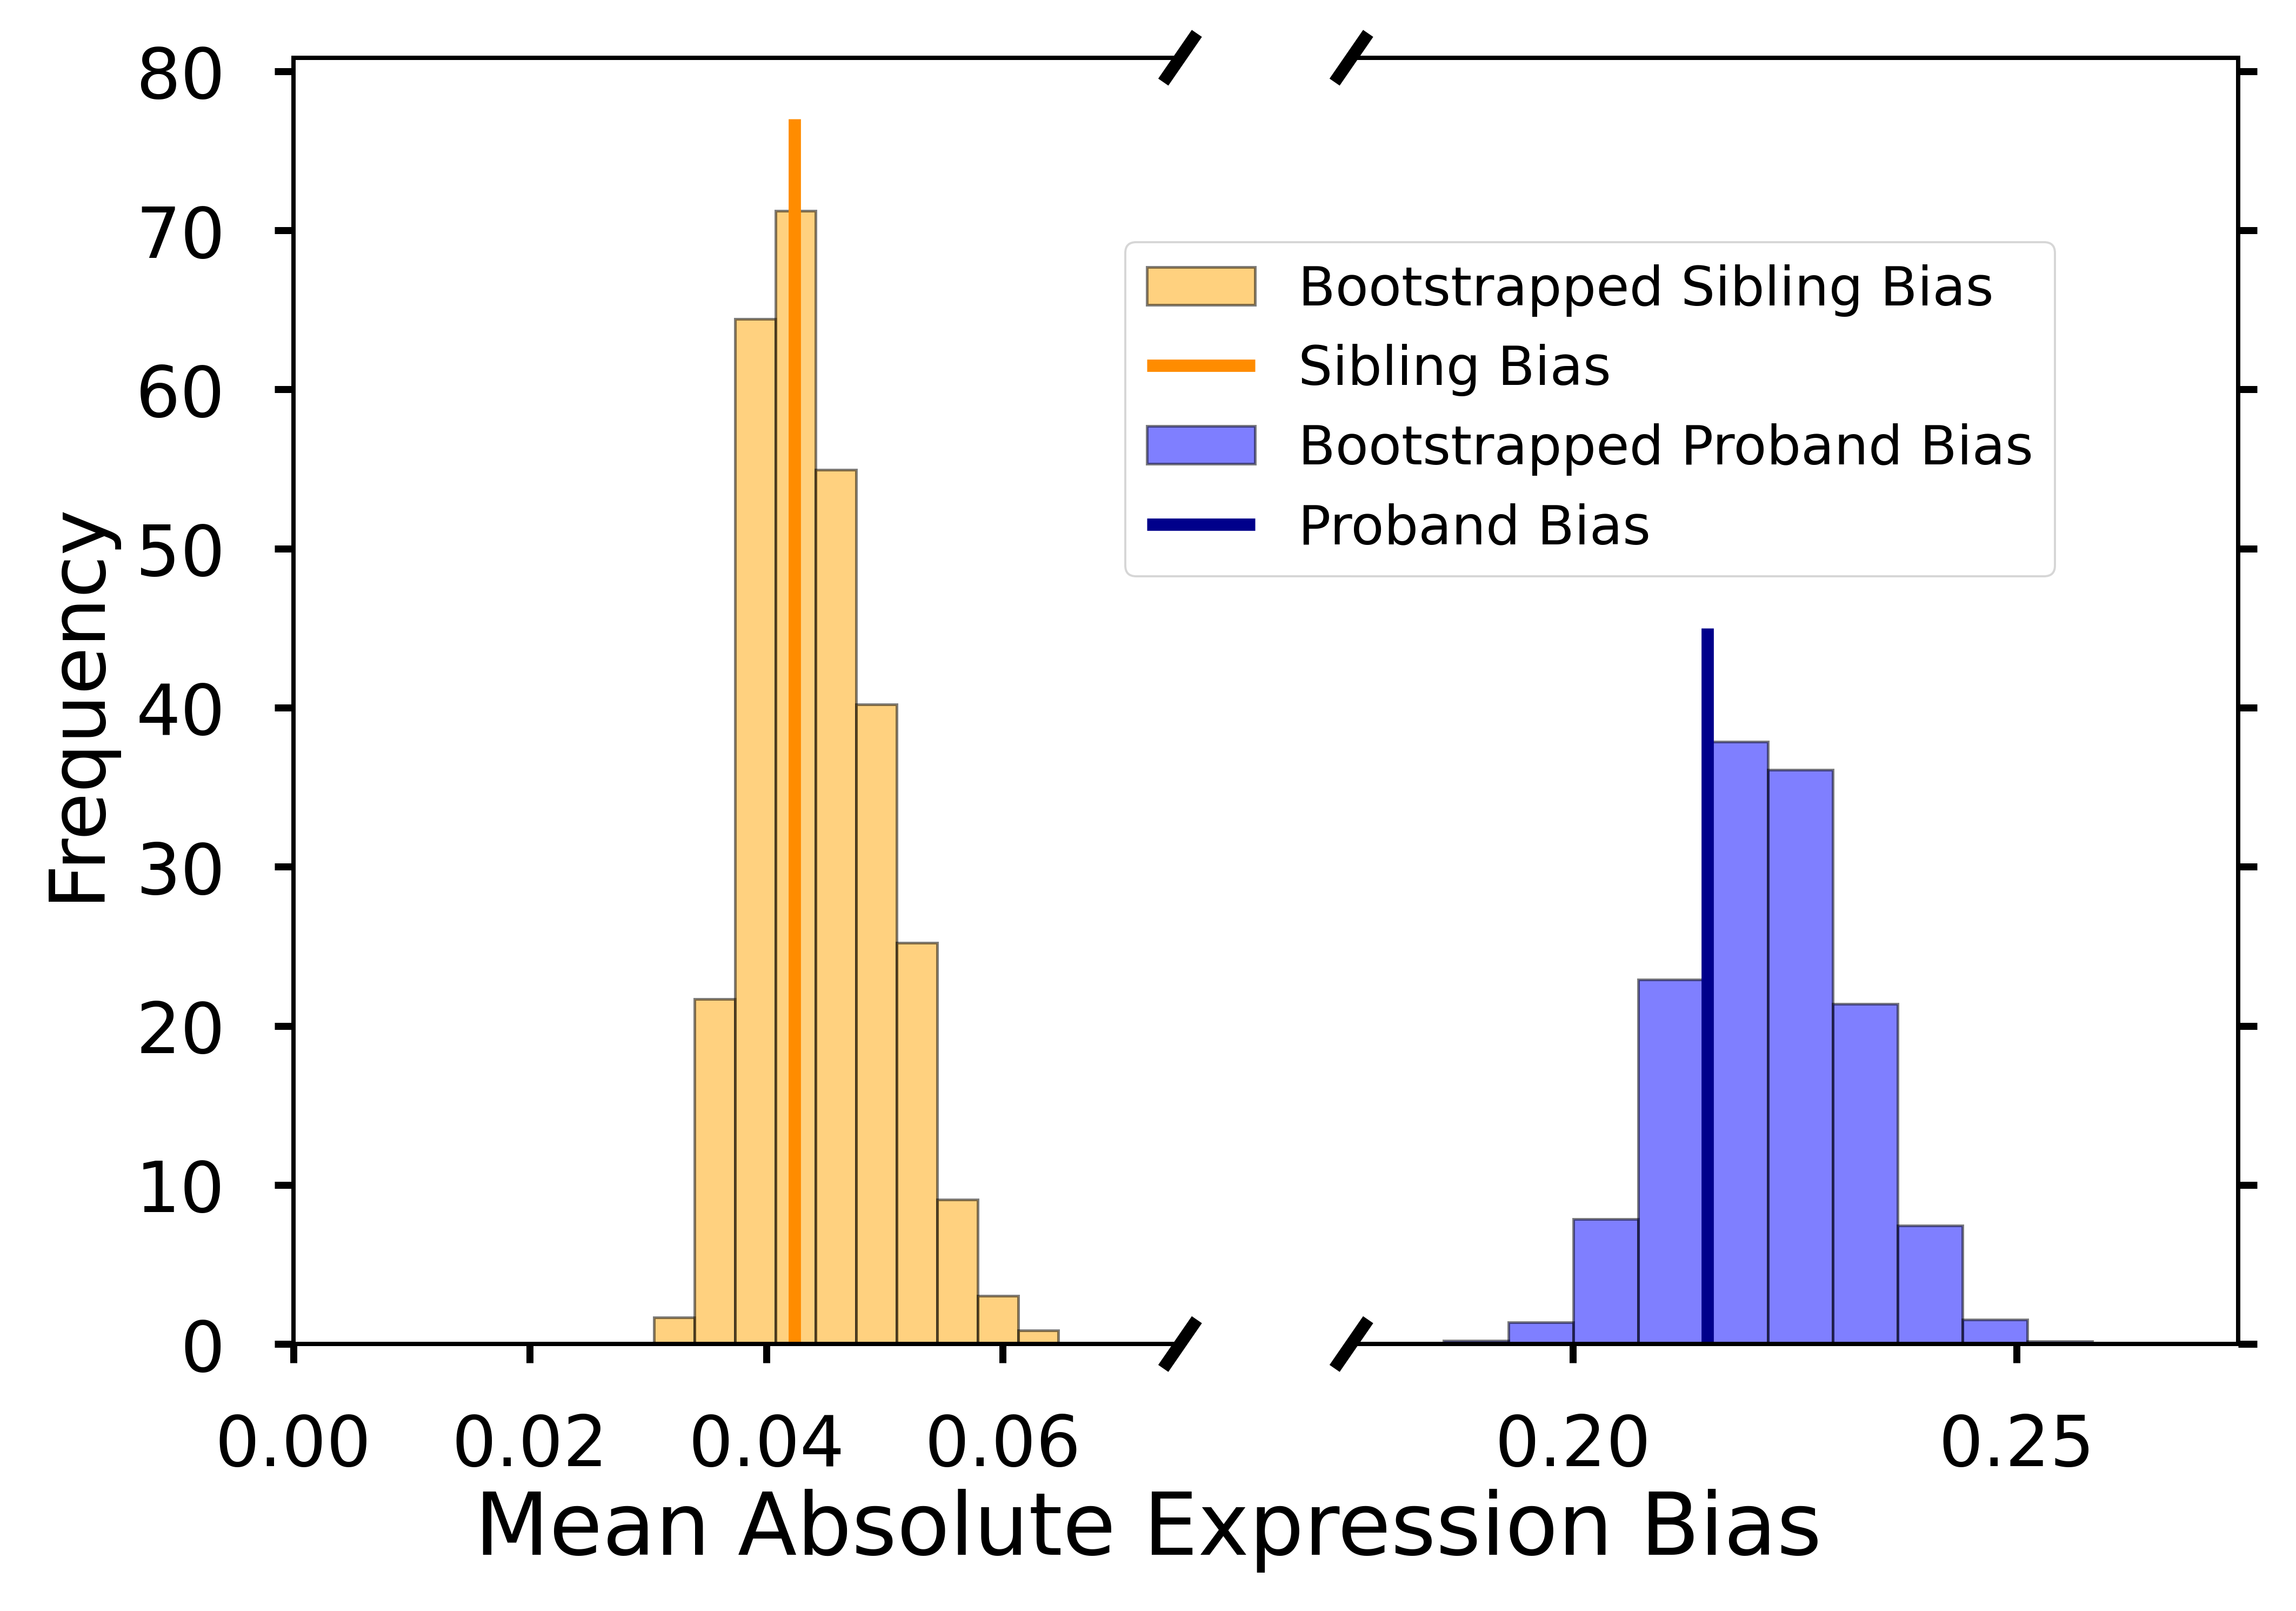

In [23]:
### V2

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, dpi=720, figsize=(6,4))
plt.style.use('seaborn-talk') # nice and clean grid

ax.hist(biases_sib_boot, density=1, color="orange", label = "Bootstrapped Sibling Bias", edgecolor='black', 
                    alpha=0.5, linewidth=0.5)
ax2.hist(biases_asd_boot, density=1, color="blue", label = "Bootstrapped Proband Bias", edgecolor='black', 
                    alpha=0.5, linewidth=0.5)

ax.vlines(x=bias_sib, ymin=0, ymax=77, color="darkorange", label="Sibling Bias")
ax2.vlines(x=bias_asd, ymin=0, ymax=45, color="darkblue", label="Proband Bias")

handles, labels = [(a + b) for a, b in zip(ax.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.35, 0.5, 0.5), fontsize=10)

ax.set_xlim((0, 0.075))  
ax2.set_xlim((0.175, 0.275))  
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax.yaxis.tick_right()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.yaxis.tick_right()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)        # top-left diagonal
ax.plot((1-d, 1+d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal

#ax.set_xlabel("Mean Absolute Expression Bias")
fig.text(0.5, -0.01, 'Mean Absolute Expression Bias', ha='center', size=16)
ax.set_ylabel("Frequency")
ax.grid(False)
plt.tight_layout()
plt.savefig("figs/Fig_2.a.pdf")

#### Fig 2A sup

In [153]:
def CI(simulations, p):
    simulations = sorted(simulations, reverse=False)
    n = len(simulations)
    u_pval = (1+p)/2.
    l_pval = (1-u_pval)
    l_indx = int(np.floor(n*l_pval))
    u_indx = int(np.floor(n*u_pval))
    return(simulations[l_indx],simulations[u_indx])

class STRBias:
    def __init__(self, STR, Bias, Rank):
        self.STR = STR
        self.Bias = Bias
        self.Rank = Rank
        self.Boots = []
    def GetCI(self, p):
        return CI(self.Boots, p)

In [183]:
(1 + 0.95)/2

0.975

In [184]:
1-0.975

0.025000000000000022

In [211]:
ASD_Boot_Dir = "dat/asd.boot.61.z2/{}.csv"
ASD_Bias_avgz = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
ASD_STR_Biases = {}
for STR, row in ASD_Bias_avgz.iterrows():
    ASD_STR_Biases[STR] = STRBias(STR, row["EFFECT"], row["Rank"])
    
for i in np.arange(1,1000,1):
    df = pd.read_csv(ASD_Boot_Dir.format(i), index_col="STR")
    for STR, row in df.iterrows():
        ASD_STR_Biases[STR].Boots.append(row["EFFECT"])

In [217]:
biases_match_rank_z1 = {}
biases_match_STR_z1 = {}
asd_boot_dir = "dat/XXXXX.CONT/"
for file in os.listdir(asd_boot_dir):
    df = pd.read_csv(asd_boot_dir+file, index_col="STR")
    for STR, row in df.iterrows():
        if STR not in biases_match_STR_z1:
            biases_match_STR_z1[STR] = []
        biases_match_STR_z1[STR].append(row["EFFECT"])
        if row["Rank"] not in biases_match_rank_z1:
            biases_match_rank_z1[row["Rank"]] = []
        biases_match_rank_z1[row["Rank"]].append(row["EFFECT"])

In [218]:
XXX = []
for i, (STR, STR_bias) in enumerate(sorted(ASD_STR_Biases.items(), key=lambda x:x[1].Rank)):
    upper, lower = STR_bias.GetCI(0.95)
    XXX.append(STR_bias.Bias)
YYY = []
for i, (Rank, data) in enumerate(sorted(biases_match_rank_z1.items(), key=lambda x:x[0])):
    upper, lower = CI(data, 0.95)

    YYY.append(np.mean(data))
for i in range(10):
    print(XXX[i], np.mean(YYY[i]))

0.5237997021246054 0.4488306087292504
0.5136188743145259 0.39819157219374857
0.5043153869106172 0.3708549600363699
0.4706811165486457 0.35058926123536677
0.4701888409497293 0.3342122711812296
0.4499879812409156 0.3205724430808686
0.4486367398690154 0.30936147423856014
0.4465656964027927 0.29935174213336474
0.441555476740324 0.2901604748341937
0.4407868937103051 0.28158704801805456


Text(0, 0.5, 'Structure Rank')

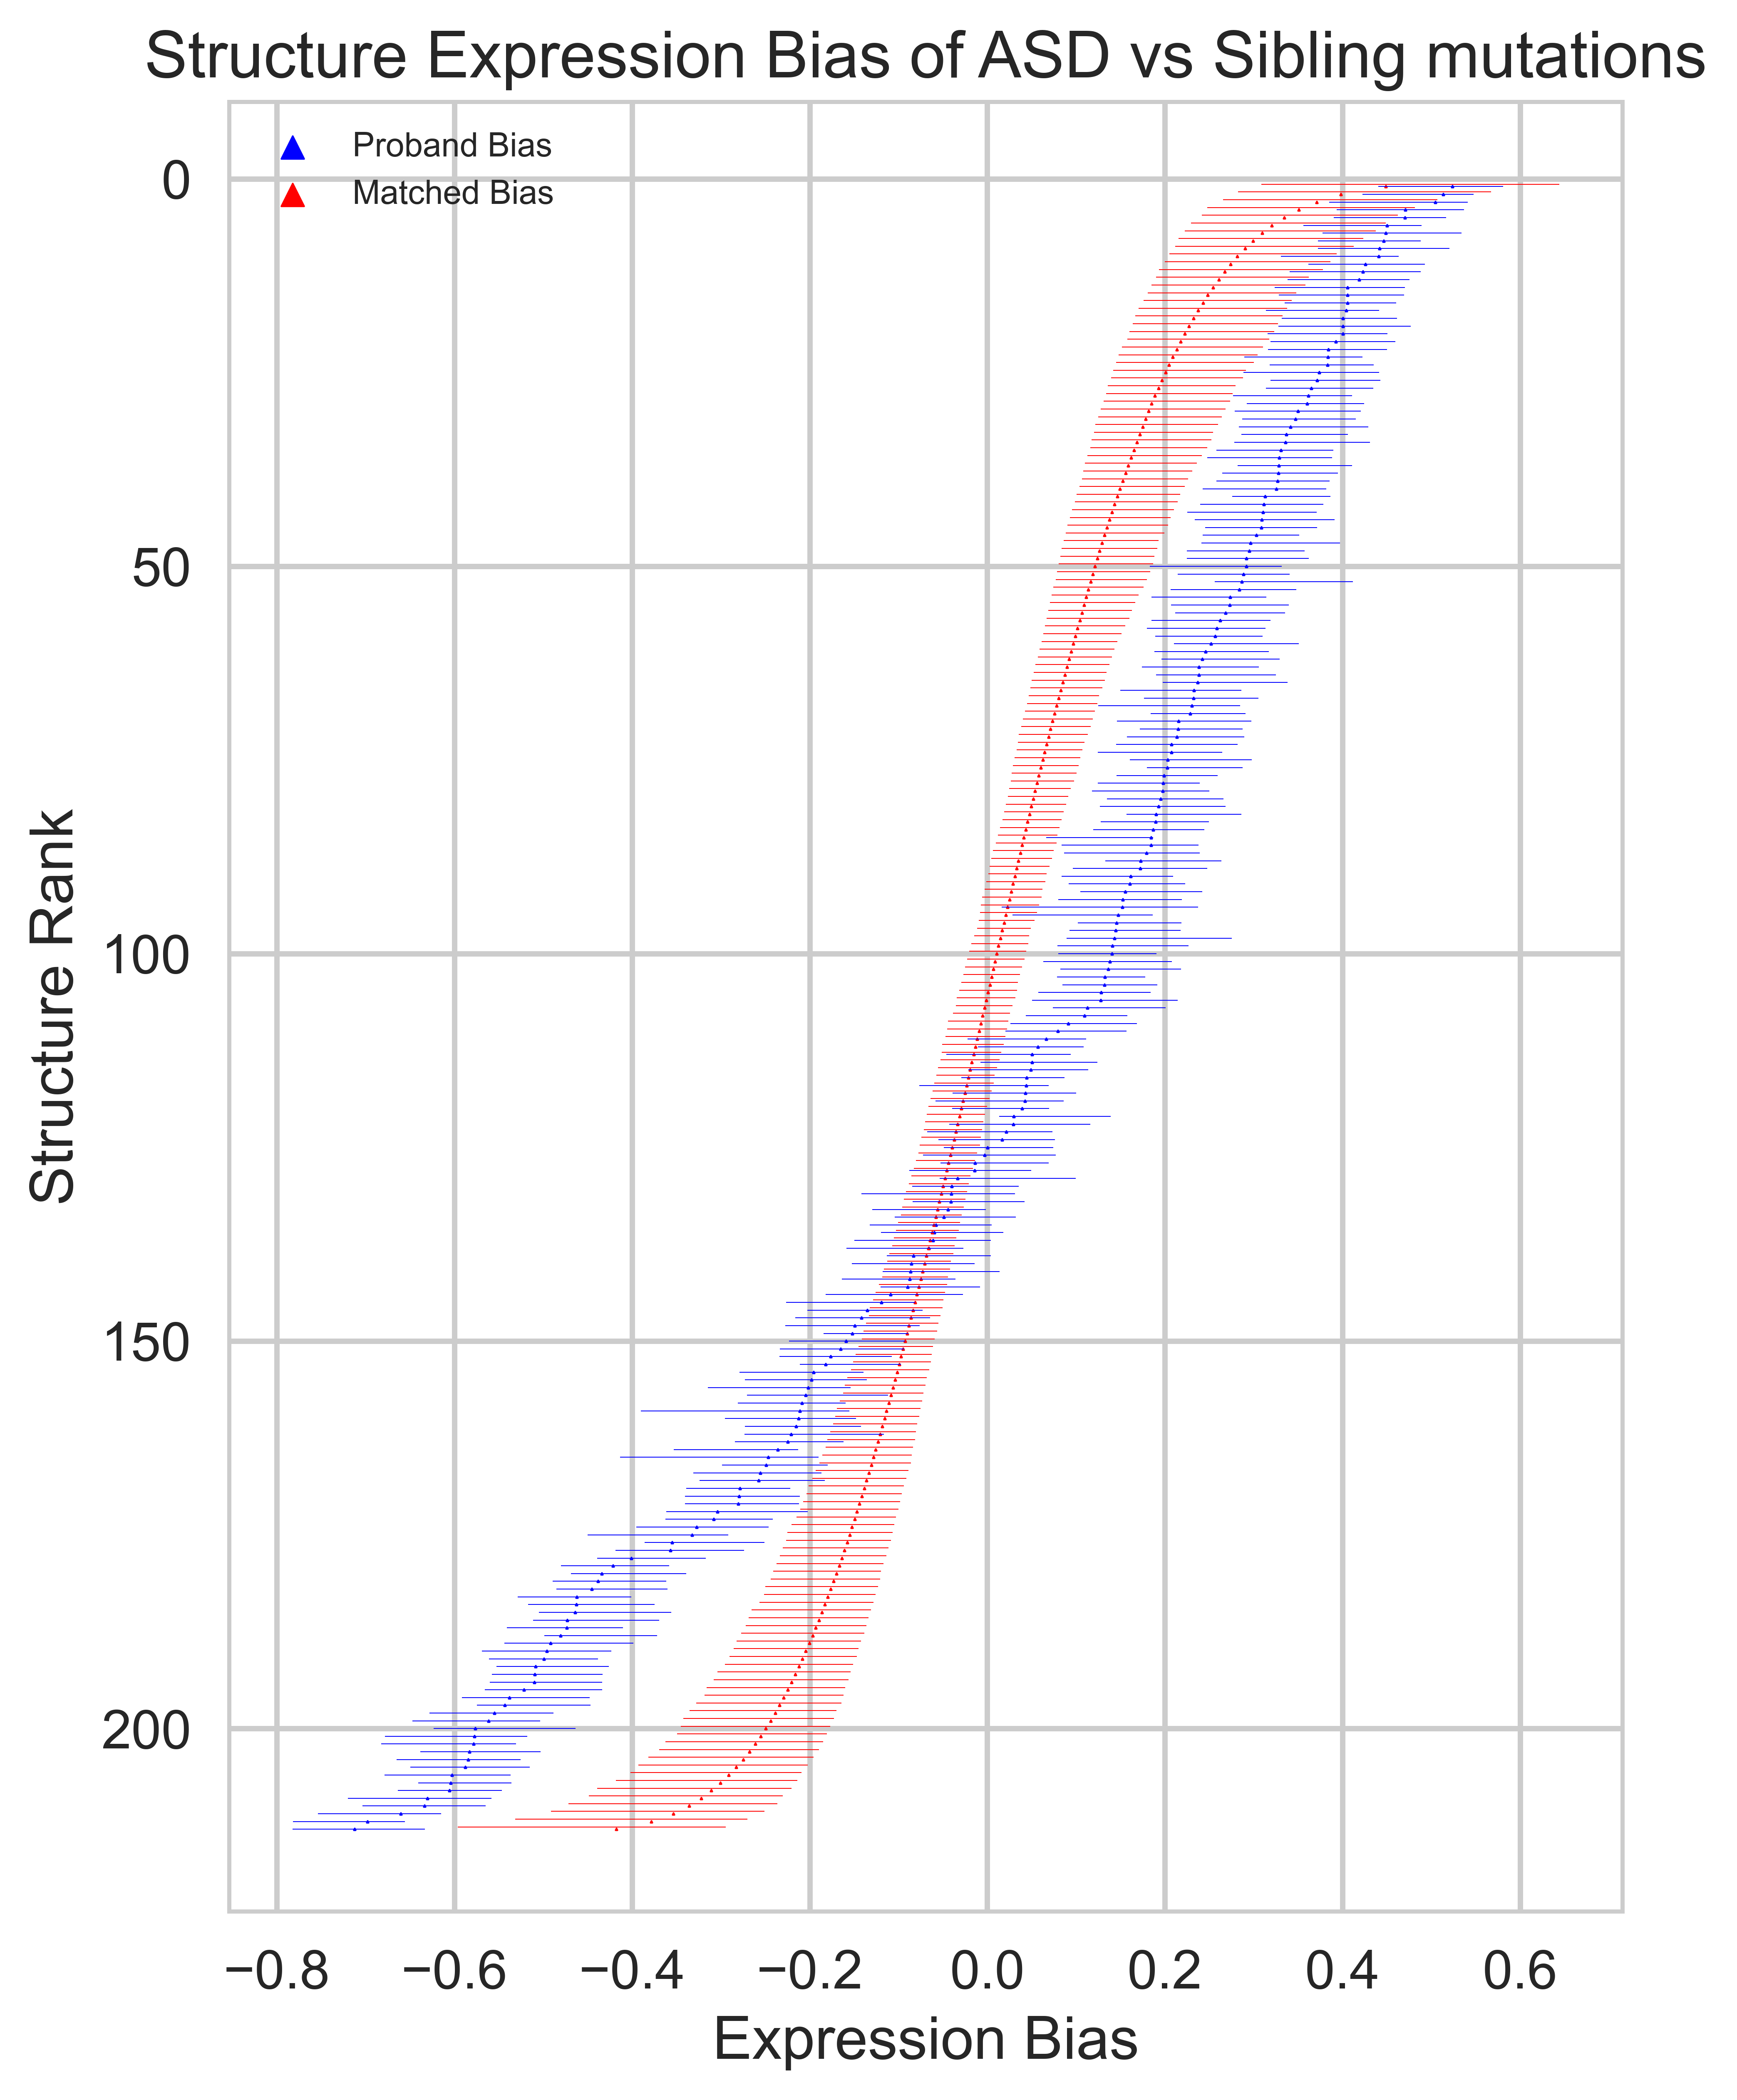

In [219]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=720)
for i, (STR, STR_bias) in enumerate(sorted(ASD_STR_Biases.items(), key=lambda x:x[1].Rank)):
    upper, lower = STR_bias.GetCI(0.95)
    ax.hlines(i+1, lower, upper, color = "blue", lw=0.2)
    x1 = ax.scatter(STR_bias.Bias, i+1, marker="^", s=0.2, color="blue")
#for i, (STR, STR_bias) in enumerate(sorted(Sib_STR_Biases.items(), key=lambda x:x[1].Rank)):
#    upper, lower = STR_bias.GetCI(0.95)
#    ax.hlines(i+1, lower, upper, color = "green", lw=0.1)
#    x2 = ax.scatter(STR_bias.Bias, i+1, marker="^", s=0.2, color="green")
    
for i, (Rank, data) in enumerate(sorted(biases_match_rank_z1.items(), key=lambda x:x[0])):
    upper, lower = CI(data, 0.95)
    ax.hlines(i+1 -0.3, lower, upper, color = "red", lw=0.2)
    x3 = ax.scatter(np.mean(data), i+1, marker="^", s=0.2, color="red")
    #print(STR_bias.Bias, np.mean(data))
#for i, (Rank, data) in enumerate(sorted(biases_sib_rank_z2.items(), key=lambda x:x[0])):
#    upper, lower = CI(data, 0.95)
#    ax.hlines(i+1, lower, upper, color = "olive", lw=0.1)
#    x4 = ax.scatter(np.mean(data), i+1, marker="^", s=0.2, color="olive")
    
#x3 = ax.scatter(BGMR_Meta_Spec["EFFECT"].values, np.arange(1, 214, 1), color="red", s=0.2, marker="^")
    
plt.gca().invert_yaxis()
lgnd = ax.legend([x1, x3], 
                 ["Proband Bias", "Matched Bias"], 
                 prop={'size': 8})
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]

#ax.hlines(xmin=-1, xmax=0.5, y=50, ls="--", color="grey", alpha=0.5, lw=0.5)
#ax.vlines(ymin =30 , ymax = 70, x=0.232, ls="--", color="grey", alpha=0.5, lw=0.5)

plt.title("Structure Expression Bias of ASD vs Sibling mutations")
plt.xlabel("Expression Bias")
plt.ylabel("Structure Rank")
#plt.savefig("figs/ExpBias_vs_Rank_match_sib.pdf")

In [160]:
def getBiasesBySTR(STR, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[STR, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases
def getBiasesByRank(Rank, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[Rank, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases

In [189]:
# ASD-match
asd_boot_dir = "dat/cont.match.bias.z1.noneg/"
match_dfs = []
for file in os.listdir(asd_boot_dir):
    df = pd.read_csv(asd_boot_dir+file, index_col="STR")
    match_dfs.append(df)

for STR, row in ASD_Bias_avgz.iterrows():
    mat_bias = getBiasesBySTR(STR, match_dfs)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    #sib_bias = getBiasesBySTR(STR, sib_dfs)
    #Z2, P2 = mannwhitneyu(sib_bias, mat_bias)
    print("%d %s %.3f %.3f, %.4f" % (row["Rank"], STR, row["EFFECT"], Z, P))
    #print("%.3f %.3f %.3f %.3e"%(np.mean(mat_bias), np.mean(sib_bias), 
    #          np.mean(mat_bias) - np.mean(sib_bias), P2))
    ASD_Bias_avgz.loc[STR, "Pvalue"] = P
    ASD_Bias_avgz.loc[STR, "Z_Match"] = Z

1 Accessory_olfactory_bulb 0.762 1.408, 0.0830
2 Dentate_gyrus 0.751 2.793, 0.0080
3 Frontal_pole_cerebral_cortex 0.726 1.774, 0.0560
4 Lateral_amygdalar_nucleus 0.720 3.132, 0.0050
5 Ansiform_lobule 0.716 0.881, 0.1990
6 Prelimbic_area 0.686 2.986, 0.0010
7 Simple_lobule 0.670 0.959, 0.1730
8 Paramedian_lobule 0.657 0.671, 0.2380
9 Visceral_area 0.631 2.102, 0.0310
10 Lateral_posterior_nucleus_of_the_thalamus 0.627 2.736, 0.0070
11 Lateral_septal_nucleus_ventral_part 0.622 2.132, 0.0340
12 Orbital_area_lateral_part 0.620 2.967, 0.0070
13 Retrosplenial_area_lateral_agranular_part 0.618 2.178, 0.0250
14 Piriform_amygdalar_area 0.612 1.035, 0.1530
15 Postpiriform_transition_area 0.603 1.158, 0.1330
16 Field_CA3 0.601 2.087, 0.0350
17 Anterior_olfactory_nucleus 0.600 2.487, 0.0140
18 Agranular_insular_area_posterior_part 0.600 1.766, 0.0520
19 Claustrum 0.594 2.161, 0.0280
20 Anteromedial_visual_area 0.589 2.333, 0.0230
21 Primary_visual_area 0.589 2.252, 0.0200
22 Orbital_area_ventrolate

165 Ventral_part_of_the_lateral_geniculate_complex 0.252 -0.902, 0.8270
166 Tuberal_nucleus 0.251 -1.461, 0.9480
167 Inferior_colliculus_dorsal_nucleus 0.246 -1.403, 0.9350
168 Pontine_gray 0.243 -2.102, 0.9900
169 Ventral_cochlear_nucleus 0.242 -2.003, 0.9910
170 Paragigantocellular_reticular_nucleus_dorsal_part 0.242 -1.825, 0.9800
171 Anteroventral_nucleus_of_thalamus 0.239 -1.278, 0.9210
172 Anterior_amygdalar_area 0.239 -0.961, 0.8350
173 Dorsal_nucleus_raphe 0.233 -0.936, 0.8310
174 Nucleus_ambiguus 0.230 -2.077, 0.9950
175 Interposed_nucleus 0.227 -1.852, 0.9870
176 Medial_pretectal_area 0.227 -1.389, 0.9440
177 Nucleus_prepositus 0.225 -1.762, 0.9840
178 Paragigantocellular_reticular_nucleus_lateral_part 0.222 -2.459, 0.9960
179 Principal_sensory_nucleus_of_the_trigeminal 0.221 -2.089, 0.9960
180 Medial_geniculate_complex_ventral_part 0.217 -1.468, 0.9390
181 Magnocellular_reticular_nucleus 0.217 -2.311, 0.9970
182 Inferior_colliculus_external_nucleus 0.216 -1.646, 0.9730
183 S

In [194]:
xx = ASD_Bias_avgz.sort_values("Z_Match",ascending=False)

In [196]:
#xx.head(50).index.values
RegionDistributionsList(xx.head(50).index.values)

Striatum 	 4 	 Nucleus_accumbens; Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Caudoputamen
Thalamus 	 8 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Parafascicular_nucleus; Rhomboid_nucleus; Submedial_nucleus_of_the_thalamus; Subparafascicular_nucleus_magnocellular_part
Pons 	 1 	 Superior_central_nucleus_raphe
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Dorsal_peduncular_area; Piriform_area
Cortical_subplate 	 3 	 Endopiriform_nucleus_dorsal_part; Claustrum; Endopiriform_nucleus_ventral_part
Isocortex 	 20 	 Prelimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anteromedial_visual_area; Primary_visual_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_lower_limb; Infralimbic_area; Visceral_area; Primary_motor_area; Frontal_pole_cerebral_cortex; Agranular_insular_area_posterior_part; Posterior_parietal_association_ar

#### Fig 2B 
Edge Permutation with Degree and Same region membership preservation 

In [28]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()
str2reg_df = pd.read_csv(MajorBrainDivisions, delimiter="\t")

In [28]:
EdgeWeightsDict = {}
topNs = list(range(200, 10, -1))
ASD_Conn_Z, ASD_Cohe_Z, ASD_Conn_P, ASD_Cohe_P, ASD_Conn_E, ASD_Cohe_E = [],[],[],[],[],[]
Sib_Conn_Z, Sib_Cohe_Z, Sib_Conn_P, Sib_Cohe_P, Sib_Conn_E, Sib_Cohe_E = [],[],[],[],[],[]
for topN in topNs:
    Permuted_ASD_cohe = []
    Permuted_ASD_conn = []
    Permuted_Sib_cohe = []
    Permuted_Sib_conn = []
    for i in range(10000):
        adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
        g_perm = LoadConnectome2(adj_mat_perm)
        asd_cohe, asd_conn = ScoreSTRSet(g_perm, SparkMetaBias.head(topN).index.values, EdgeWeightsDict)
        sib_cohe, sib_conn = ScoreSTRSet(g_perm, SibBias.head(topN).index.values, EdgeWeightsDict)
        Permuted_ASD_cohe.append(asd_cohe)
        Permuted_ASD_conn.append(asd_conn)
        Permuted_Sib_cohe.append(sib_cohe)
        Permuted_Sib_conn.append(sib_conn)
    asd_cohe, asd_conn = ScoreSTRSet(g, SparkMetaBias.head(topN).index.values, EdgeWeightsDict)
    sib_cohe, sib_conn = ScoreSTRSet(g, SibBias.head(topN).index.values, EdgeWeightsDict)
    
    asd_z_conn, asd_p_conn = GetPermutationP(Permuted_ASD_conn, asd_conn)
    asd_z_cohe, asd_p_cohe = GetPermutationP(Permuted_ASD_cohe, asd_cohe)
    effect_conn = asd_conn/np.mean(Permuted_ASD_conn)
    effect_cohe = asd_cohe/np.mean(Permuted_ASD_cohe)
    ASD_Conn_Z.append(asd_z_conn); ASD_Cohe_Z.append(asd_z_cohe)
    ASD_Conn_P.append(asd_p_conn); ASD_Cohe_P.append(asd_p_cohe)
    ASD_Conn_E.append(effect_conn); ASD_Cohe_E.append(effect_cohe)
    
    sib_z_conn, sib_p_conn = GetPermutationP(Permuted_Sib_conn, sib_conn)
    sib_z_cohe, sib_p_cohe = GetPermutationP(Permuted_Sib_cohe, sib_cohe)
    effect_conn = sib_conn/np.mean(Permuted_Sib_conn)
    effect_cohe = sib_cohe/np.mean(Permuted_Sib_cohe)
    Sib_Conn_Z.append(sib_z_conn); Sib_Cohe_Z.append(sib_z_cohe)
    Sib_Conn_P.append(sib_p_conn); Sib_Cohe_P.append(sib_p_cohe)
    Sib_Conn_E.append(effect_conn); Sib_Cohe_E.append(effect_cohe)

In [96]:
max(ASD_Cohe_E)

1.282969667578941

In [265]:
smooth_ASD_Cohe_E = movingavgs = movingAVG(ASD_Cohe_E, 5)
smooth_Sib_Cohe_E = movingavgs = movingAVG(Sib_Cohe_E, 5)

In [351]:
Sib_Conn_P = np.array(Sib_Conn_P)

In [407]:
XX = ASD_Conn_P < 0.05/200
XX

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [406]:
XX = Sib_Conn_P < 0.05/200
XX

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [402]:
"%.3e"%(0.01/213)

'4.695e-05'

In [420]:
ASD_Conn_P = np.array(ASD_Conn_P)
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(dpi=720, figsize=(16,8))
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 32})
#ax.scatter(49, max(smooth_ASD_Cohe_E), color="black", s=80, marker="*")
ax.plot(topNs[-26:], smooth_ASD_Cohe_E[-26:], color="blue", ls="dashed", lw=3)
ax.plot(topNs[:-25], smooth_ASD_Cohe_E[:-25], color="blue", ls="solid", lw=3)
ax.plot(topNs, smooth_Sib_Cohe_E, color="orange", ls="dashed", lw=3)

ax.hlines(xmin=min(topNs), xmax=max(topNs), y=1, ls="--", color="grey")
ax.grid(True)

ax.plot(np.arange(0), np.arange(0), label="ASD Probands", ls="solid", color="blue")
ax.plot(np.arange(0), np.arange(0), label="Siblings", ls="solid", color="orange")
ax.plot(np.arange(0), np.arange(0), label='Significant', ls="solid", color="grey")
ax.plot(np.arange(0), np.arange(0), label='Not Significant', ls="dashed", color="grey")
        ## P_perm < %.3e'%(0.05/213)

ax.legend(fontsize=24, loc="lower right")
ax.set_ylabel("Cohesiveness Effect Size",fontsize=28)
ax.set_xlabel("Number of Most Biased Structures",fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#plt.legend(['ASD Probands', 'Siblings', 
#            'P_perm < %.3e'%(0.05/213), 'P_perm > %.3e'%(0.05/213)], 
#          fontsize=24, loc="lower right")
plt.tight_layout()
plt.savefig("figs/Fig_2.b.pdf")

## Fig 3

In [294]:
Cartesian_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Exp_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                                   index_col="ROW")

In [295]:
# Annotate graph
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()
Cartesian_distances

g2 = subgraph(g, SparkMetaBias.head(50).index.values)

# Annotate Region to Node
for i, node in enumerate(g2.vs):
    label_ = g2.vs[i]["label"]
    g2.vs[i]["Region"] = str2reg[label_]
    g2.vs[i]["Bias"] = SparkMetaBias.loc[label_, "EFFECT"]
    g2.vs[i]["Bias_Rank"] = SparkMetaBias.loc[label_, "Rank"]
    g2.vs[i]["Core_Circuit"] = label_ in Circuit_STRs

# Annotate Edge with 1.+= Cross Region; 2. Cartesin Distance; 3. Expression pho
for i, e in enumerate(g2.es):
    src_idx = e.source
    tgt_idx = e.target
    src_name = g2.vs(src_idx)["label"][0]
    tgt_name = g2.vs(tgt_idx)["label"][0]
    if g2.vs(src_idx)["Region"] == g2.vs(tgt_idx)["Region"]:
        g2.es[i]["Region"] = "within"
    else:
        g2.es[i]["Region"] = "across"
    g2.es[i]["Cartesian_dist"] = Cartesian_distances.loc[src_name, tgt_name]
    g2.es[i]["Expression_dist"] = Exp_distances.loc[src_name, tgt_name]
    
g2.write_gml("spark_meta_circuit.gml")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: A boolean vertex attribute was converted to numeric at src/io/gml.c:715


In [310]:
##dir(g2.vs.select(label="Nucleus_accumbens")[0])

In [324]:
g2.vs.select(label="Nucleus_of_reuniens")[0].predecessors()

[igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 0, {'label': 'Anterior_cingulate_area_dorsal_part', 'Region': 'Isocortex', 'Bias': 0.2900775972375872, 'Bias_Rank': 29, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 5, {'label': 'Accessory_olfactory_bulb', 'Region': 'Olfactory_areas', 'Bias': 0.331158292046405, 'Bias_Rank': 17, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 15, {'label': 'Claustrum', 'Region': 'Cortical_subplate', 'Bias': 0.3242871394053688, 'Bias_Rank': 20, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 24, {'label': 'Infralimbic_area', 'Region': 'Isocortex', 'Bias': 0.3815705165714621, 'Bias_Rank': 8, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 37, {'label': 'Prelimbic_area', 'Region': 'Isocortex', 'Bias': 0.4026126802670569, 'Bias_Rank': 4, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 43, {'label': 'Subiculum_

In [325]:
g2.vs.select(label="Nucleus_of_reuniens")[0].successors()

[igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 0, {'label': 'Anterior_cingulate_area_dorsal_part', 'Region': 'Isocortex', 'Bias': 0.2900775972375872, 'Bias_Rank': 29, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 1, {'label': 'Anterior_cingulate_area_ventral_part', 'Region': 'Isocortex', 'Bias': 0.2372916285004755, 'Bias_Rank': 46, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 2, {'label': 'Nucleus_accumbens', 'Region': 'Striatum', 'Bias': 0.3647362267383864, 'Bias_Rank': 11, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 3, {'label': 'Agranular_insular_area_posterior_part', 'Region': 'Isocortex', 'Bias': 0.2475712400244004, 'Bias_Rank': 42, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 4, {'label': 'Agranular_insular_area_ventral_part', 'Region': 'Isocortex', 'Bias': 0.3010389351965387, 'Bias_Rank': 23, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph ob

## Fig 4

#### Fig 4A
ASD circuits are full of Long distance connections

In [24]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

In [25]:
#Circuit_STRs = pd.read_csv("dat/Circuit_GN_42.csv")["STR"].values
Circuit_STRs = pd.read_csv("dat/bias2/ASD.EW.Spec.bias.csv").head(50)["STR"].values

In [29]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distancesDF, cutoff=0)
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 6000, 100000]
Dist_cut_graphs = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)
    
#ASD_STRs = SparkMetaBias.head(49).index.values
ASD_STRs = Circuit_STRs

Sib_STRs = SibBias.head(50).index.values
ASD_top49_conn, Sib_top49_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    cohe, Nconn = ScoreSTRSet(g_, ASD_STRs, EdgeWeightsDict)
    ASD_top49_conn.append(Nconn)
    cohe, Nconn = ScoreSTRSet(g_, Sib_STRs, EdgeWeightsDict)
    Sib_top49_conn.append(Nconn)
ASD_top49_conn = np.array(ASD_top49_conn)
Sib_top49_conn = np.array(Sib_top49_conn)
N_Connections_total = np.array(N_Connections_total)

(array([7.06455771e-05, 2.43334766e-04, 3.21829851e-04, 2.61276500e-04,
        2.19786240e-04, 1.52504738e-04, 7.84950857e-05, 3.58834678e-05,
        1.00922253e-05, 7.84950857e-06]),
 array([   0.        ,  713.42045808, 1426.84091615, 2140.26137423,
        2853.6818323 , 3567.10229038, 4280.52274845, 4993.94320653,
        5707.3636646 , 6420.78412268, 7134.20458075]),
 <BarContainer object of 10 artists>)

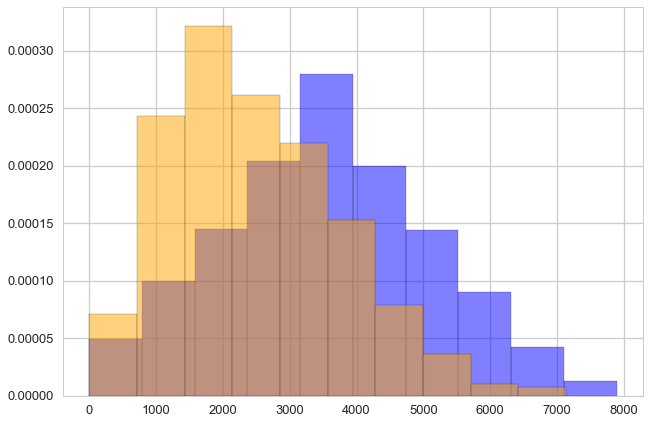

In [89]:
# Distance Dist
ASD_Dists = Cartesian_distancesDF.loc[ASD_STRs,ASD_STRs]
Sib_Dists = Cartesian_distancesDF.loc[Sib_STRs,Sib_STRs]
XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
fig, ax = plt.subplots()
ax.hist(ASD_Dists.values.flatten(), color="blue", density=1, alpha=0.5, edgecolor='black')
ax.hist(Sib_Dists.values.flatten(), color="orange", density=1, alpha=0.5, edgecolor='black')

(array([1.46683111e-04, 3.36508313e-04, 3.96907241e-04, 3.62393568e-04,
        2.50224130e-04, 1.03541019e-04, 7.76557645e-05, 1.03541019e-04,
        1.72568366e-05, 1.72568366e-05]),
 array([ 333.5416016 ,  885.42777669, 1437.31395178, 1989.20012686,
        2541.08630195, 3092.97247704, 3644.85865212, 4196.74482721,
        4748.6310023 , 5300.51717738, 5852.40335247]),
 <BarContainer object of 10 artists>)

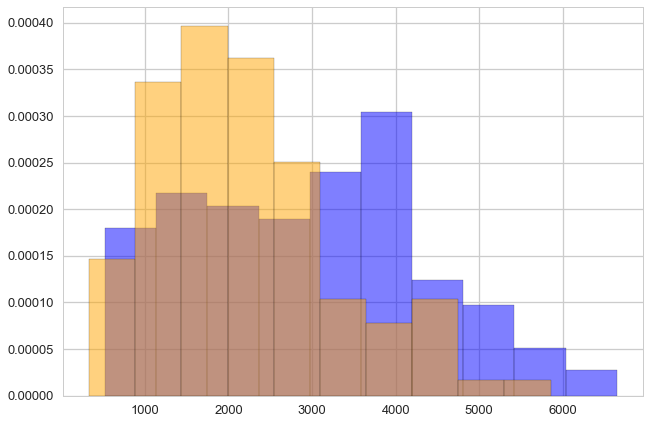

In [83]:
ASD_EdgeDists = Cartesian_distances_w_edge.loc[ASD_STRs,ASD_STRs]
Sib_EdgeDists = Cartesian_distances_w_edge.loc[Sib_STRs,Sib_STRs]
XX = [x for x in ASD_EdgeDists.values.flatten() if x > 0]
YY = [x for x in Sib_EdgeDists.values.flatten() if x > 0]
fig, ax = plt.subplots()
ax.hist(XX, color="blue", density=1, alpha=0.5, edgecolor='black')
ax.hist(YY, color="orange", density=1, alpha=0.5, edgecolor='black')


In [95]:
ZZ_ = [x for x in Cartesian_distancesDF.values.flatten() if x > 0]
ZZ = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]

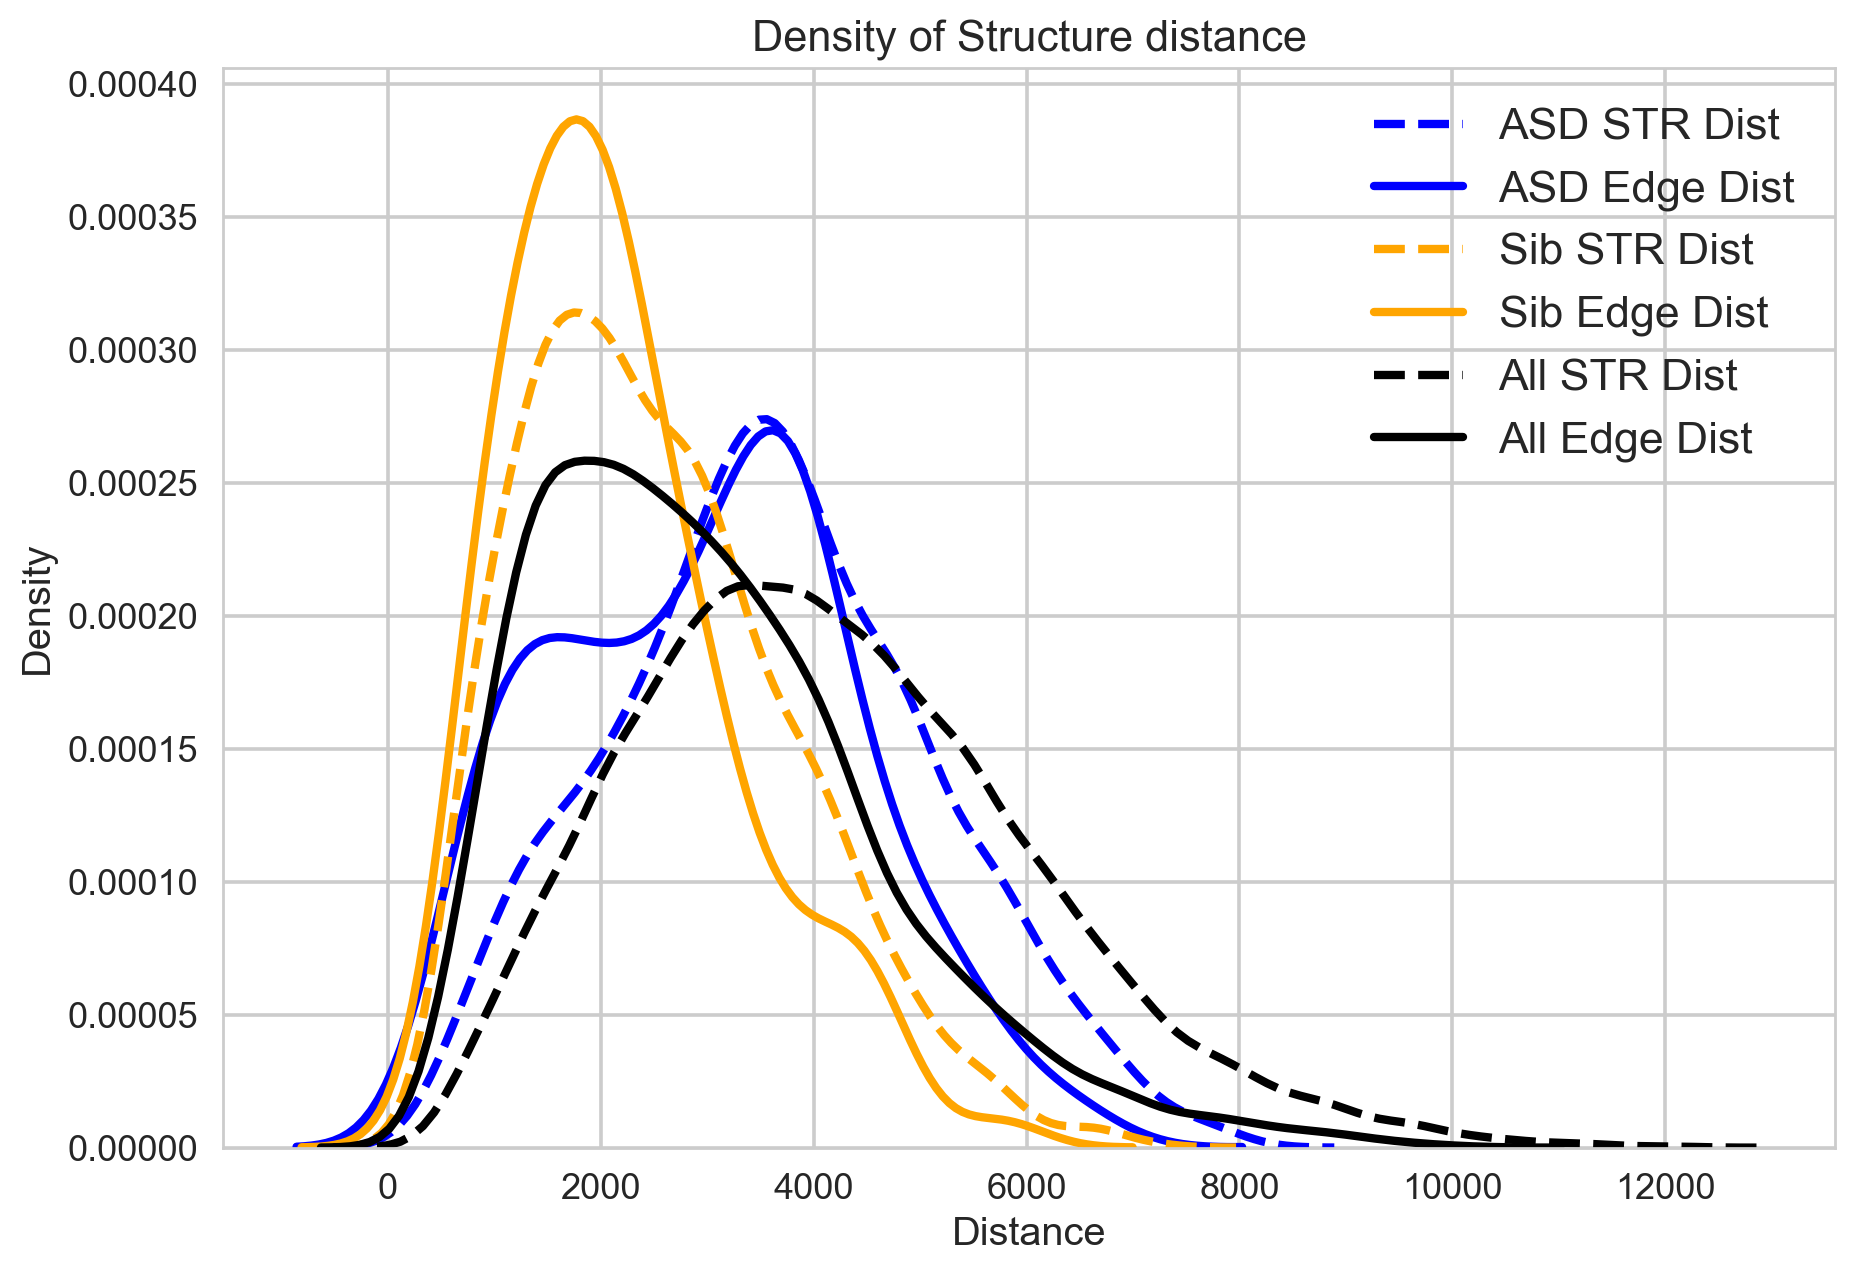

In [100]:
import seaborn as sns
fig, ax = plt.subplots(dpi=200)
sns.distplot(XX_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "ASD STR Dist", color="blue")
sns.distplot(XX, hist = False, kde = True, kde_kws = {'linewidth': 3, }, label = "ASD Edge Dist", color="blue")
sns.distplot(YY_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "Sib STR Dist", color="orange")
sns.distplot(YY, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Sib Edge Dist", color="orange")

sns.distplot(ZZ_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "All STR Dist", color="black")
sns.distplot(ZZ, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "All Edge Dist", color="black")
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density of Structure distance')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.savefig("figs/Density_Str_edge_distance.pdf")

In [115]:
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs_distance_mat = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    Dist_cut_graphs_distance_mat.append(distance_mat_new)
    
#ASD_STRs = SparkMetaBias.head(49).index.values
ASD_STRs = Circuit_STRs

Sib_STRs = SibBias.head(50).index.values
ASD_top49_pairs, Sib_top49_pairs = [], []
N_pairs_total = []
for i, matttt in enumerate(Dist_cut_graphs_distance_mat):
    ASD_Dists = matttt.loc[ASD_STRs,ASD_STRs]
    Sib_Dists = matttt.loc[Sib_STRs,Sib_STRs]
    XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
    YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
    ZZ_ = [x for x in matttt.values.flatten() if x > 0]
    ASD_top49_pairs.append(len(XX_)/len(ZZ_))
    Sib_top49_pairs.append(len(YY_)/len(ZZ_))
ASD_top49_pairs = np.array(ASD_top49_pairs)
Sib_top49_pairs = np.array(Sib_top49_pairs)
N_pairs_total = np.array(N_pairs_total)


In [30]:
print(ASD_top49_conn, Sib_top49_conn)

[30 70 72 99 57 20  6] [29 74 68 23 14  2  0]


In [102]:
print(np.sum(ASD_top49_conn), np.sum(Sib_top49_conn))

354 210


In [31]:
g2_asd_49 = subgraph(g, ASD_STRs)
g2_sib_49 = subgraph(g, Sib_STRs)
bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


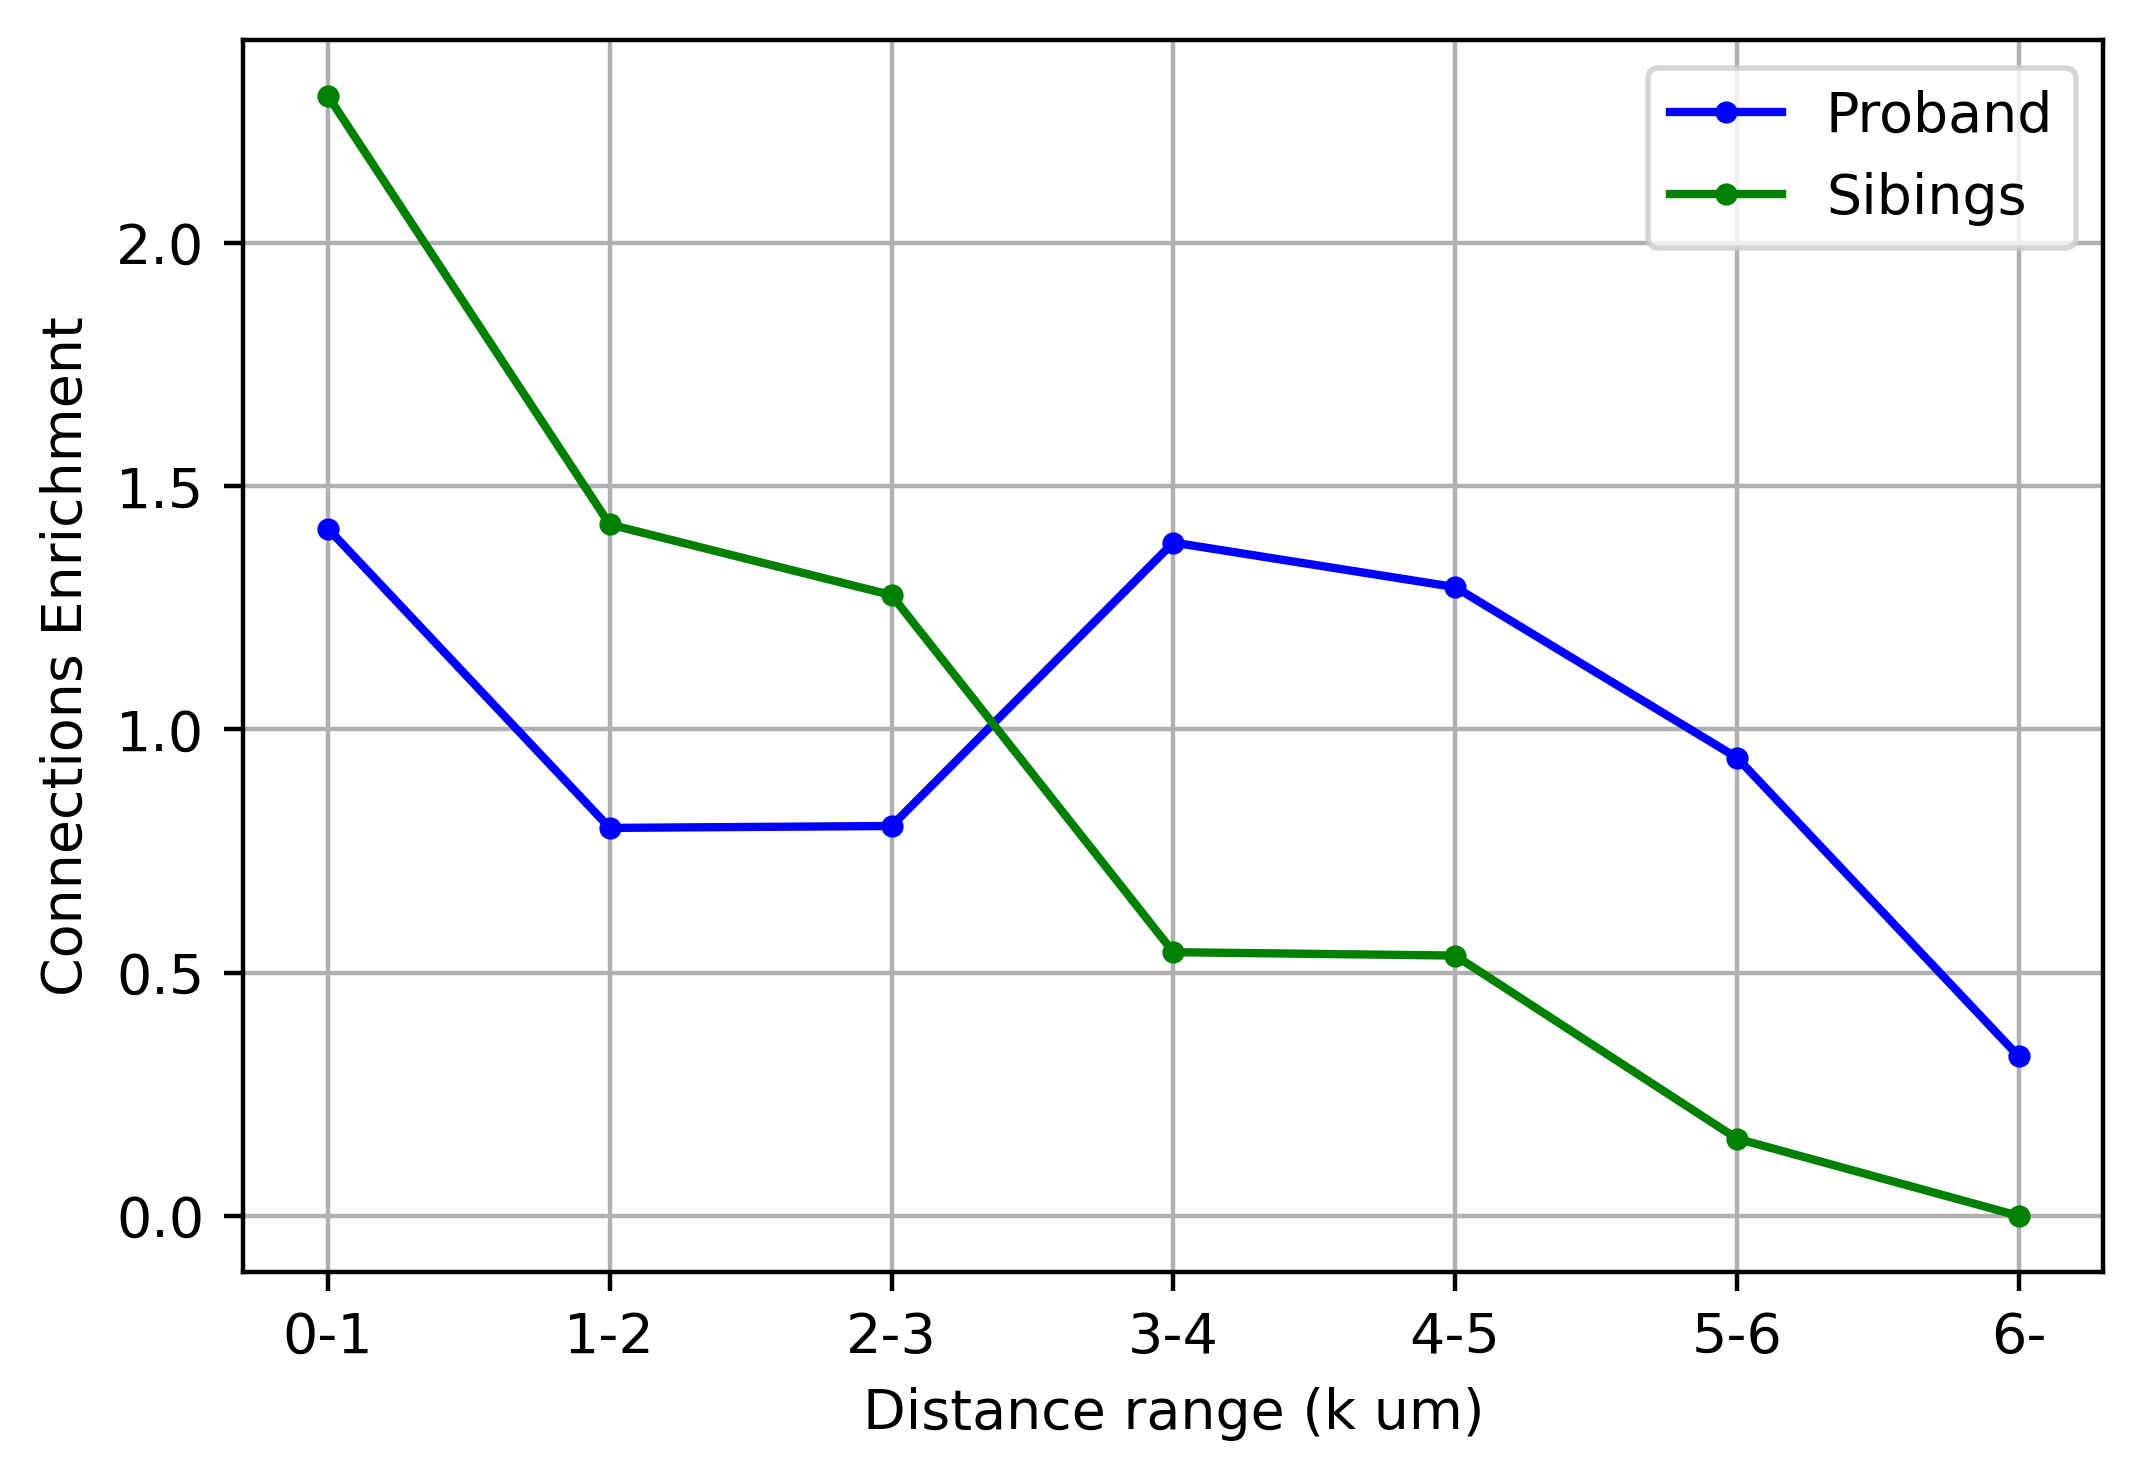

In [33]:
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.ticker as mticker  
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))
dat_asd = ASD_top49_conn/N_Connections_total
dat_sib = Sib_top49_conn/N_Connections_total
ax1.plot(np.arange(7), dat_asd/bl_asd, marker=".", label="Proband", color="blue")
ax1.plot(np.arange(7), dat_sib/bl_sib, marker=".", label="Sibings", color="green")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range (k um)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
fig.savefig("figs/Fig_4.A.pdf")

In [61]:
# Add bootstrapped error bars

def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    N_Connections_total = np.array(N_Connections_total)
    return ASD_top49_conn, Sib_top49_conn, N_Connections_total


Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)


Nboot = 10000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    g2_asd_49 = subgraph(g, ASD_STR_boot)
    g2_sib_49 = subgraph(g, Sib_STR_boot)
    bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
    bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)
    ASD_top49_conn, Sib_top49_conn, N_Connections_total = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    dat_asd = ASD_top49_conn/N_Connections_total
    dat_sib = Sib_top49_conn/N_Connections_total
    #Dat_ASD_boots.append(dat_asd/bl_asd)
    Dat_ASD_boots.append(dat_asd)
    #Dat_Sib_boots.append(dat_sib/bl_sib)
    Dat_Sib_boots.append(dat_sib)

Dat_ASD_boots = np.array(Dat_ASD_boots)
Dat_Sib_boots = np.array(Dat_Sib_boots)

In [62]:
ASD_STRs = Circuit_STRs
Sib_STRs = SibBias.head(50).index.values
ASD_top49_conn, Sib_top49_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
    Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
ASD_top49_conn = np.array(ASD_top49_conn)
Sib_top49_conn = np.array(Sib_top49_conn)
N_Connections_total = np.array(N_Connections_total)


g2_asd_49 = subgraph(g, ASD_STRs)
g2_sib_49 = subgraph(g, Sib_STRs)
bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)

dat_asd = ASD_top49_conn/N_Connections_total
dat_sib = Sib_top49_conn/N_Connections_total

#real_asd_dat = dat_asd/bl_asd
#real_sib_dat = dat_sib/bl_sib
real_asd_dat = dat_asd
real_sib_dat = dat_sib

In [74]:
print(ASD_top49_conn, Sib_top49_conn)

[30 70 72 99 57 26] [29 74 68 23 14  2]


In [63]:
Dat_ASD_boots = np.array(Dat_ASD_boots)
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    boots.sort()
    low, up = real_asd_dat[i] - boots[50], boots[950] - real_asd_dat[i]
    #low, up = boots[50], boots[950]
    ASD_Dy.append((low, up))
    
    boots = Dat_Sib_boots[:, i]
    boots.sort()
    low, up = boots[50], boots[950]
    Sib_Dy.append((low, up))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [64]:
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = Dat_Sib_boots[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [65]:
# Add Matched
XXX = []
for i in range(1000):
    df = pd.read_csv("dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv".format(i), index_col="STR")
    top50 = df.head(50).index.values
    Match_top49_conn = []

    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        Match_top49_conn.append(len(subgraph(g_, top50).es))
    Match_top49_conn = np.array(Match_top49_conn)
    N_Connections_total = np.array(N_Connections_total)

    g2_match_49 = subgraph(g, top50)
    bl_match = len(g2_match_49.es)/np.count_nonzero(adj_mat)

    dat_match = Match_top49_conn/N_Connections_total
    XXX.append(dat_match)
XXX = np.array(XXX)

In [70]:
XXX.shape
match_mean = XXX.mean(axis=0)
match_mean.shape
Match_Dy = XXX.std(axis=0)
Match_Dy.shape

(6,)

In [71]:
Match_Dy

array([0.04718723, 0.03569306, 0.02283219, 0.01949023, 0.02092373,
       0.03117057])

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


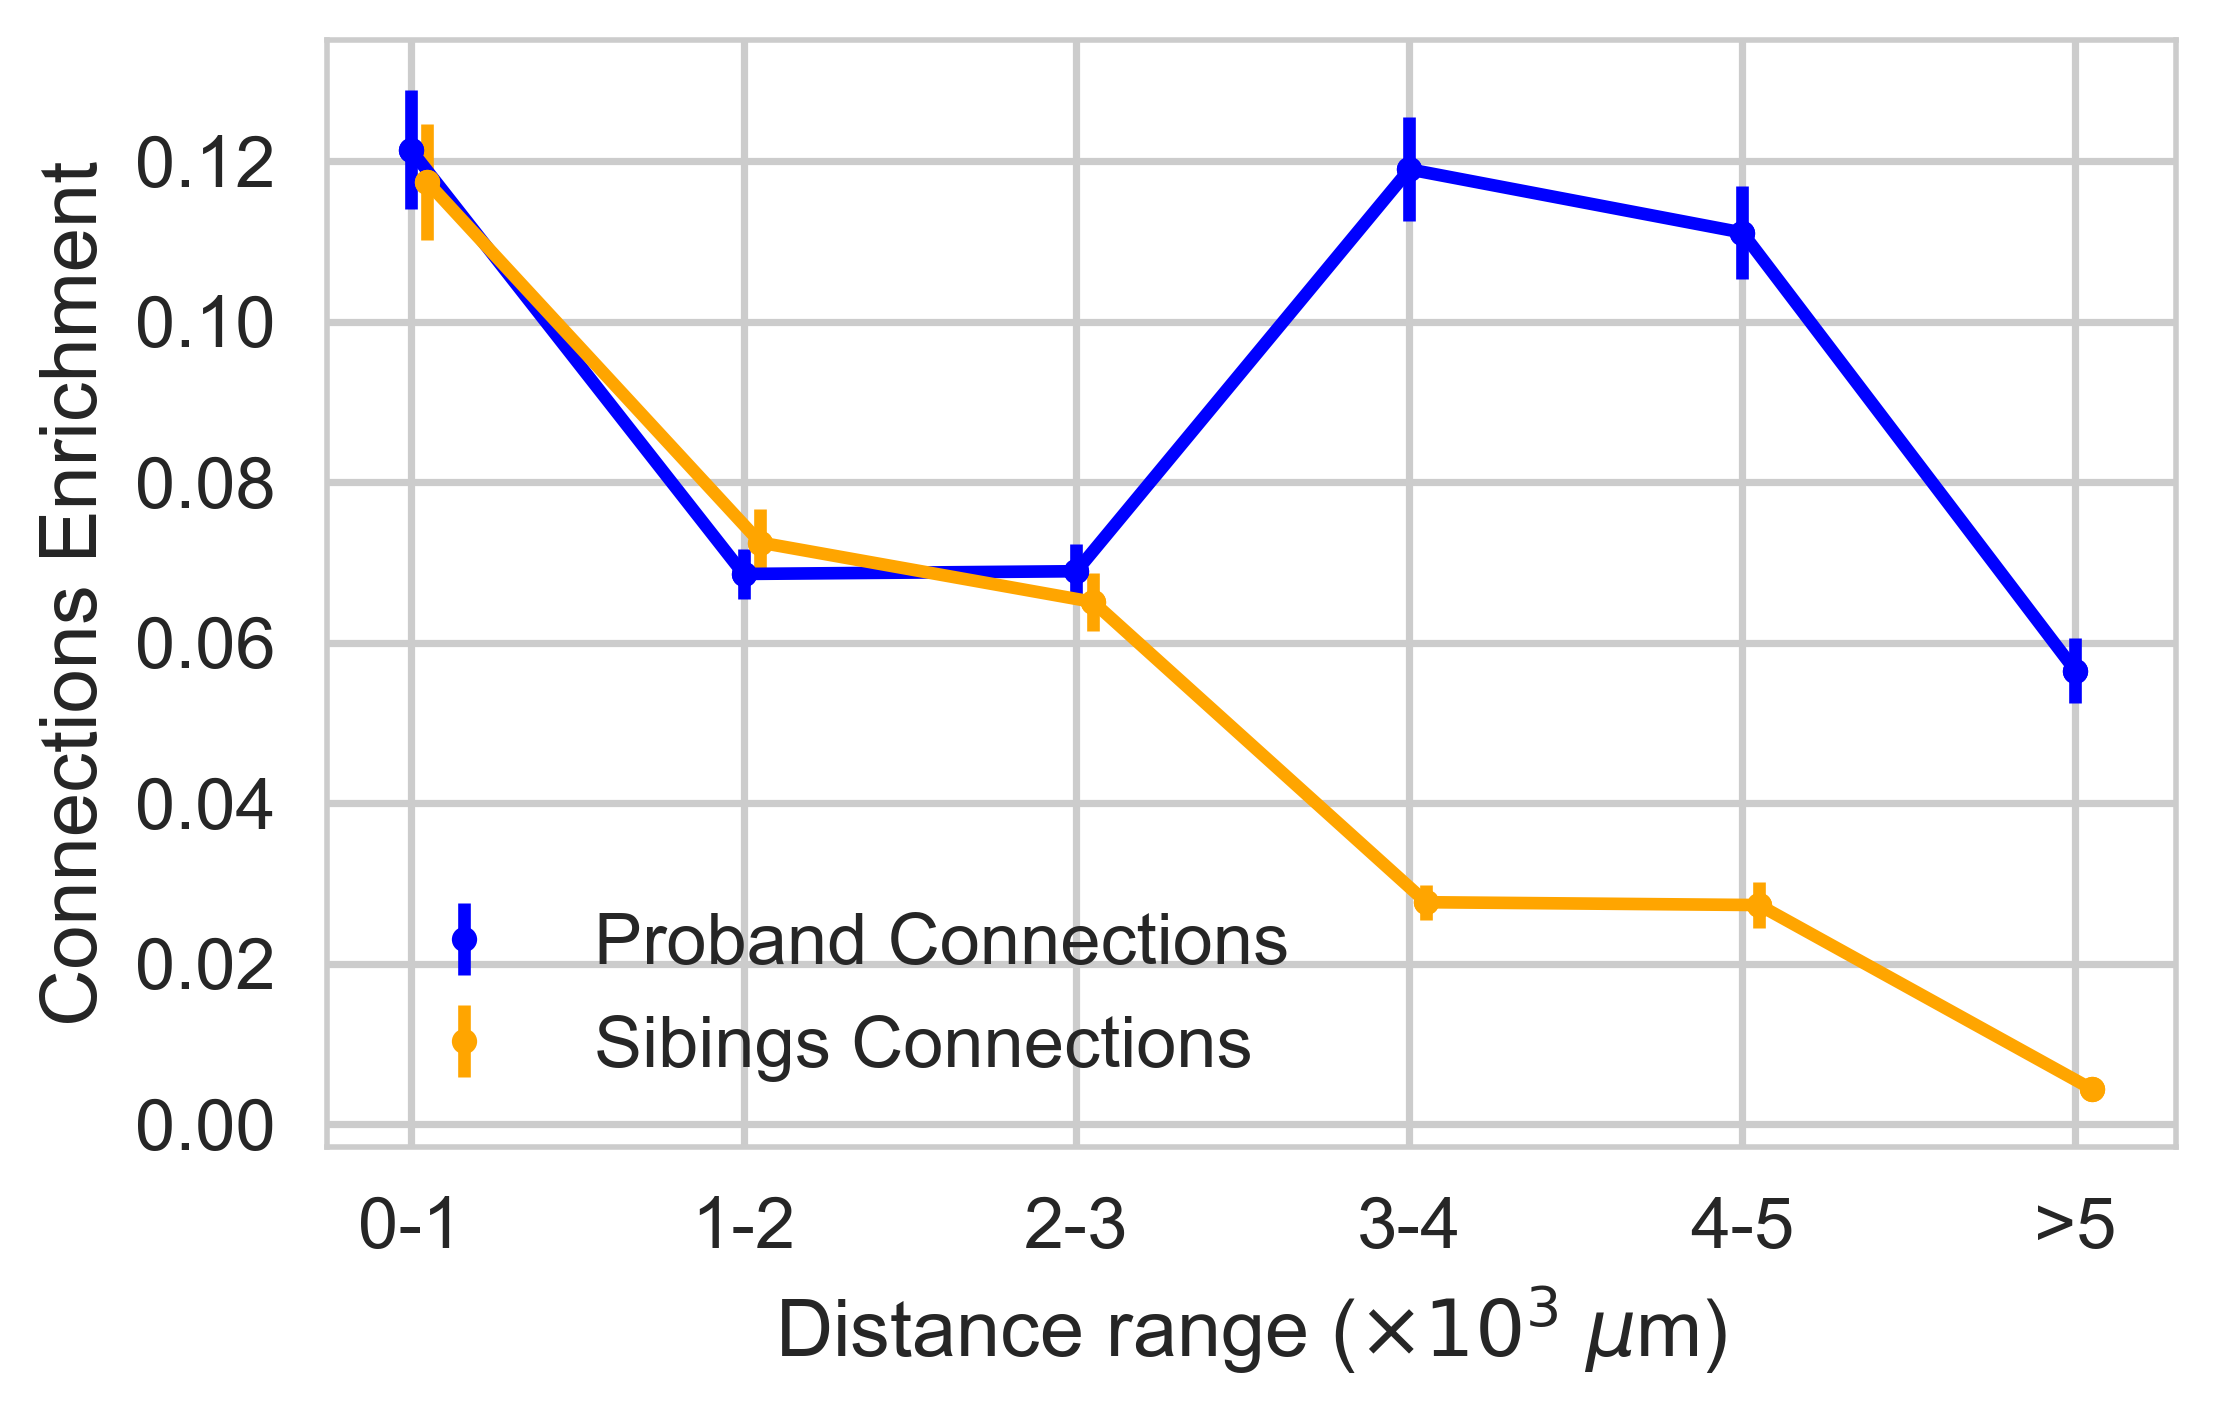

In [122]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))
#dat_asd = ASD_top49_conn/N_Connections_total
#dat_sib = Sib_top49_conn/N_Connections_total
ax1.errorbar(np.arange(6), real_asd_dat, yerr=ASD_Dy/2, fmt=".", label="Proband Connections", color="blue")
ax1.errorbar(np.arange(6) + 0.05, real_sib_dat, yerr=Sib_Dy/2, fmt=".k", label="Sibings Connections", color="orange")
#ax1.errorbar(np.arange(6) + 0.1, match_mean, yerr=Match_Dy/2, fmt=".k", label="Match", color="red")
ax1.plot(np.arange(6), real_asd_dat, marker="." , color="blue")
ax1.plot(np.arange(6) + 0.05, real_sib_dat, marker=".", color="orange")

#$ax1.plot(np.arange(6), ASD_top49_pairs, marker=".", label="Proband STR Pairs", color="blue", ls="dashed")
#ax1.plot(np.arange(6) + 0.05, Sib_top49_pairs, marker=".", label="Sibings STR pairs", color="orange", ls="dashed")

#ax1.plot(np.arange(6) + 0.1, match_mean, marker=".", color="red")
#ax1.axhline(y=1, ls="--", color="grey")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Density")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
fig.savefig("figs/Fig_4.A.pdf")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


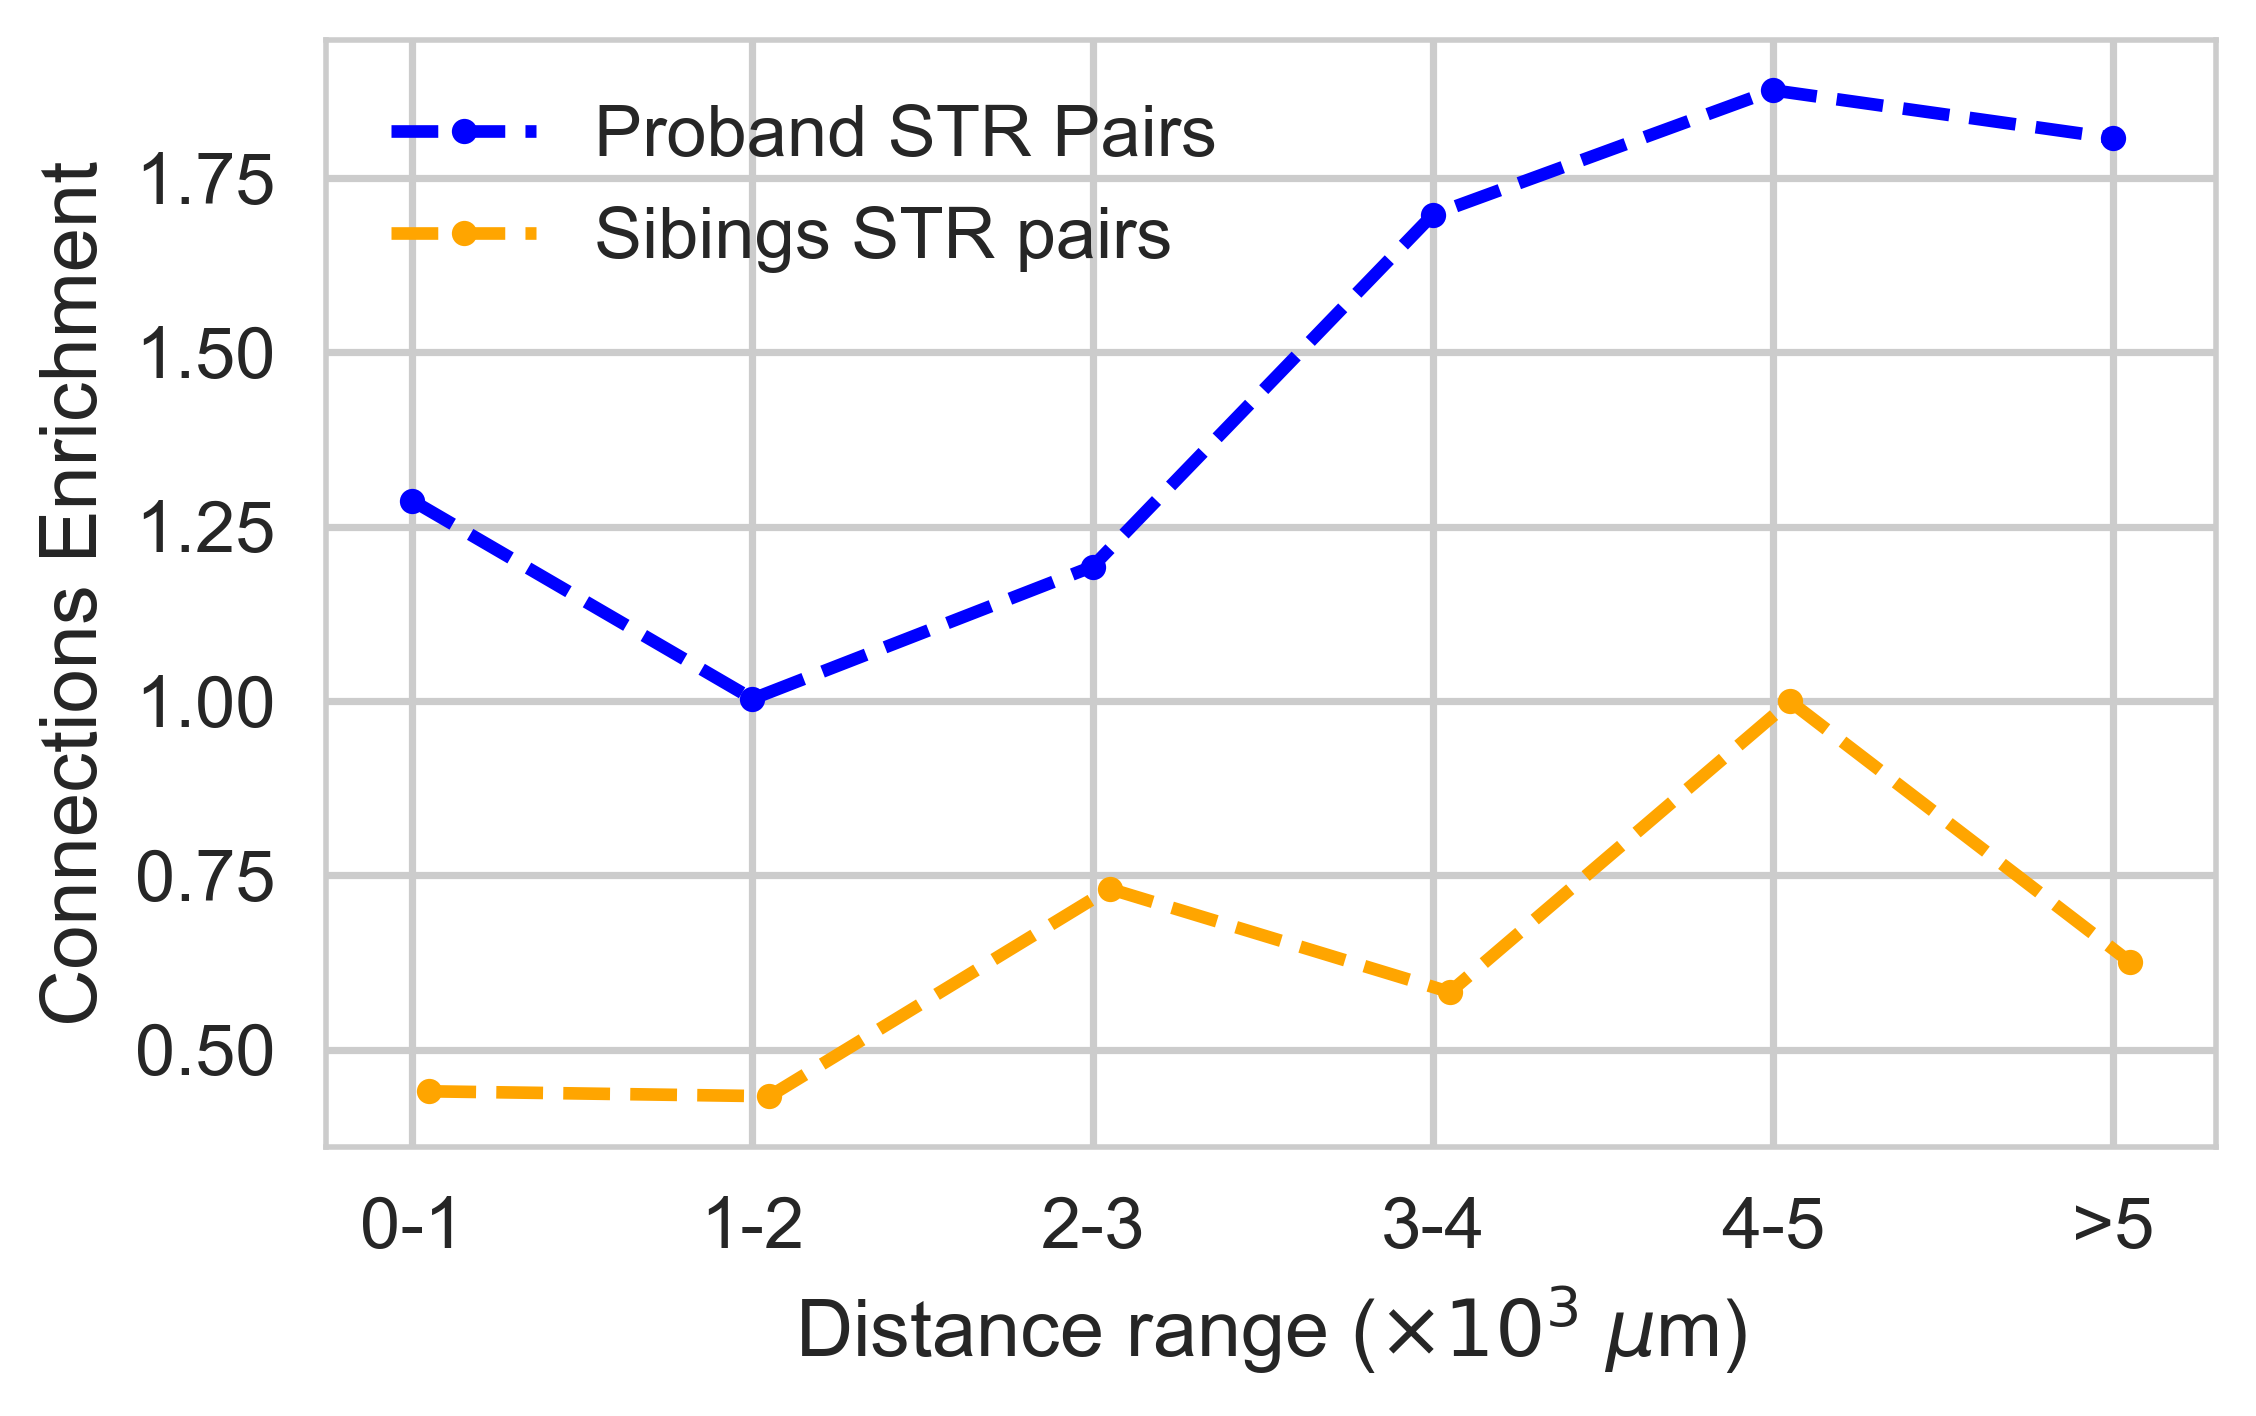

In [121]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))

ax1.plot(np.arange(6), real_asd_dat/ASD_top49_pairs, marker=".", 
         label="Proband STR Pairs", color="blue", ls="dashed")
ax1.plot(np.arange(6) + 0.05, real_sib_dat/Sib_top49_pairs, marker=".", 
         label="Sibings STR pairs", color="orange", ls="dashed")

#ax1.plot(np.arange(6) + 0.1, match_mean, marker=".", color="red")
#ax1.axhline(y=1, ls="--", color="grey")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
fig.savefig("figs/Sup.Fig.X.pdf")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


[Text(-1.0, 0, ''),
 Text(0.0, 0, '0-1'),
 Text(1.0, 0, '1-2'),
 Text(2.0, 0, '2-3'),
 Text(3.0, 0, '3-4'),
 Text(4.0, 0, '4-5'),
 Text(5.0, 0, '5-6'),
 Text(6.0, 0, '6-'),
 Text(7.0, 0, '')]

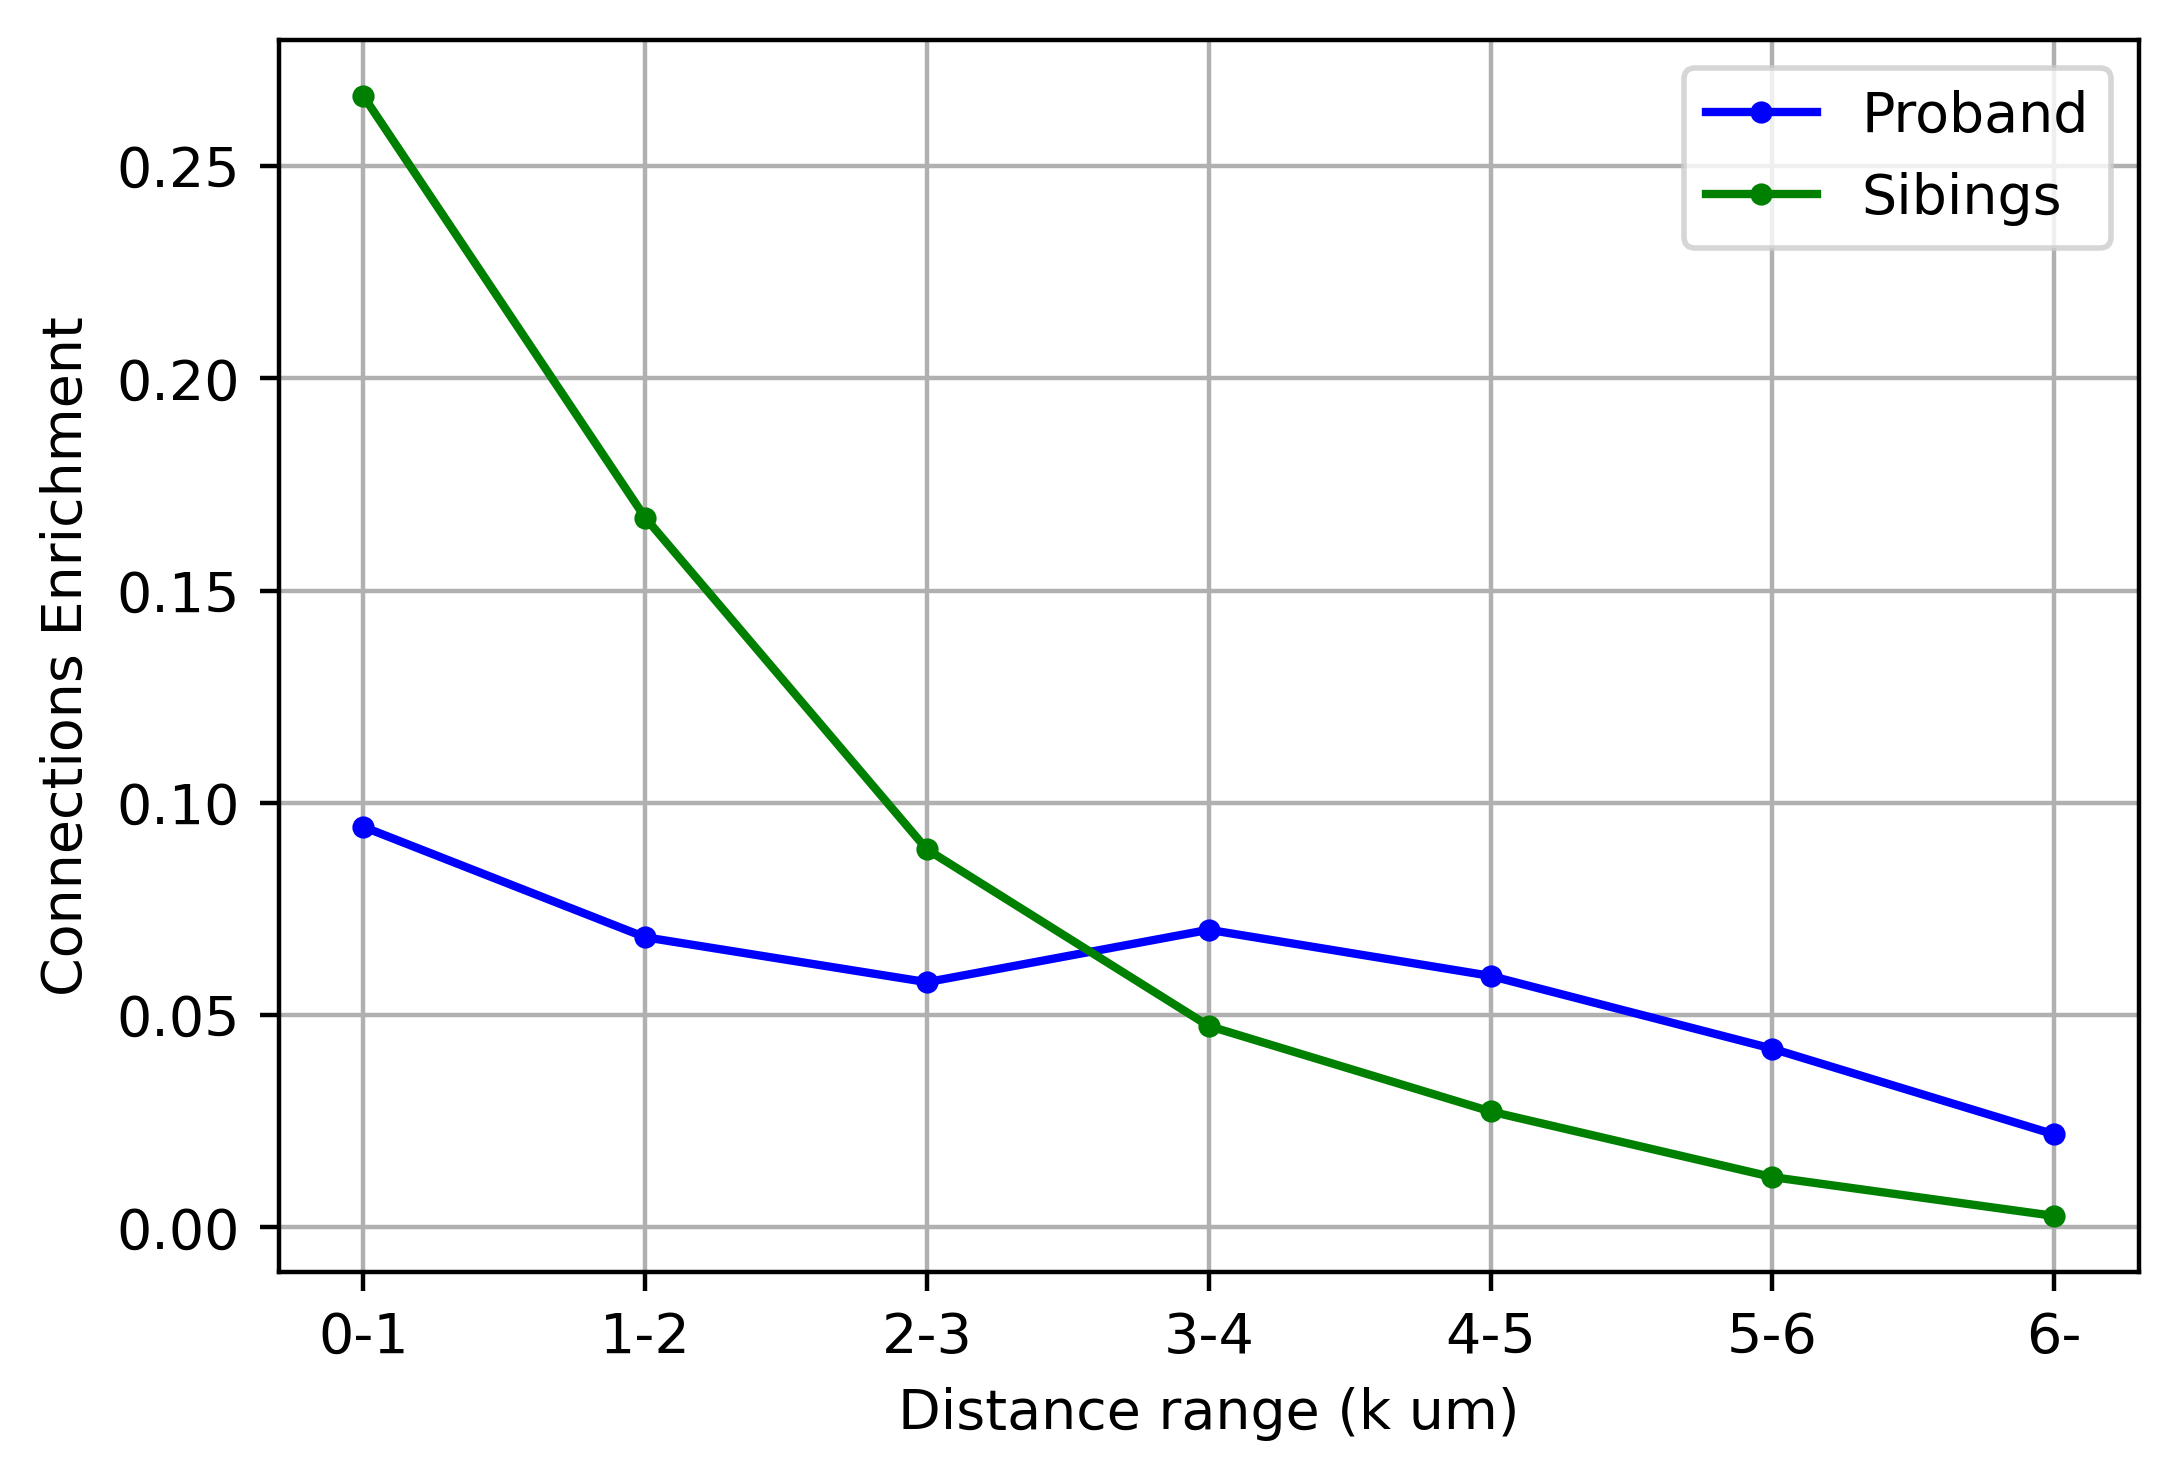

In [112]:
import matplotlib.ticker as mticker  
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))
ax1.plot(np.arange(7), ASD_top49_pairs, marker=".", label="Proband", color="blue")
ax1.plot(np.arange(7), Sib_top49_pairs, marker=".", label="Sibings", color="green")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range (k um)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))

#### Fig 4A New

In [124]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

In [ ]:
#Circuit_STRs = pd.read_csv("dat/Circuit_GN_42.csv")["STR"].values
Circuit_STRs = pd.read_csv("dat/bias2/ASD.EW.Spec.bias.csv").head(50)["STR"].values

In [141]:
# Variables
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000] # 6 intervals
N_conn_asd_binX = []
N_conn_sib_binX = []
N_conn_all_binX = []
N_pair_asd_binX = []
N_pair_sib_binX = []
N_pair_all_binX = []

N_conn_asd_binX_bs = []
N_conn_sib_binX_bs = []
N_pair_sib_binX_bs = []
N_pair_all_binX_bs = []

In [142]:
# Calculate conns at each distance bin
Dist_cut_graphs_distance_mat = []
Dist_cut_graphs = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, 
                     keep="bw", cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    Dist_cut_graphs_distance_mat.append(Conn_mat_new)
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)
    
ASD_STRs = Circuit_STRs
Sib_STRs = SibBias.head(50).index.values
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_conn_all_binX.append(len(g_.es))
    N_conn_asd_binX.append(len(subgraph(g_, ASD_STRs).es))
    N_conn_sib_binX.append(len(subgraph(g_, Sib_STRs).es))

N_conn_asd_binX = np.array(N_conn_asd_binX)
N_conn_sib_binX = np.array(N_conn_sib_binX)
N_conn_all_binX = np.array(N_conn_all_binX)
    

In [143]:
# Bootstrape the dist errors
def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    return ASD_top49_conn, Sib_top49_conn

Nboot = 10000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    ASD_top49_conn, Sib_top49_conn = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    N_conn_asd_binX_bs.append(ASD_top49_conn)
    N_conn_sib_binX_bs.append(Sib_top49_conn)

N_conn_asd_binX_bs = np.array(N_conn_asd_binX_bs)
N_conn_sib_binX_bs = np.array(N_conn_sib_binX_bs)
print(N_conn_asd_binX_bs.shape)

(10000, 6)


In [145]:
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = N_conn_asd_binX_bs[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = N_conn_sib_binX_bs[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [149]:
# Calculate Npairs at each distance bin
Dist_cut_graphs_distance_mat = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    Dist_cut_graphs_distance_mat.append(distance_mat_new)
    
for i, matttt in enumerate(Dist_cut_graphs_distance_mat):
    ASD_Dists = matttt.loc[ASD_STRs,ASD_STRs]
    Sib_Dists = matttt.loc[Sib_STRs,Sib_STRs]
    XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
    YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
    ZZ_ = [x for x in matttt.values.flatten() if x > 0]
    N_pair_asd_binX.append(len(XX_))
    N_pair_sib_binX.append(len(YY_))
    N_pair_all_binX.append(len(ZZ_))
N_pair_asd_binX = np.array(N_pair_asd_binX)
N_pair_sib_binX = np.array(N_pair_sib_binX)
N_pair_all_binX = np.array(N_pair_all_binX)


/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


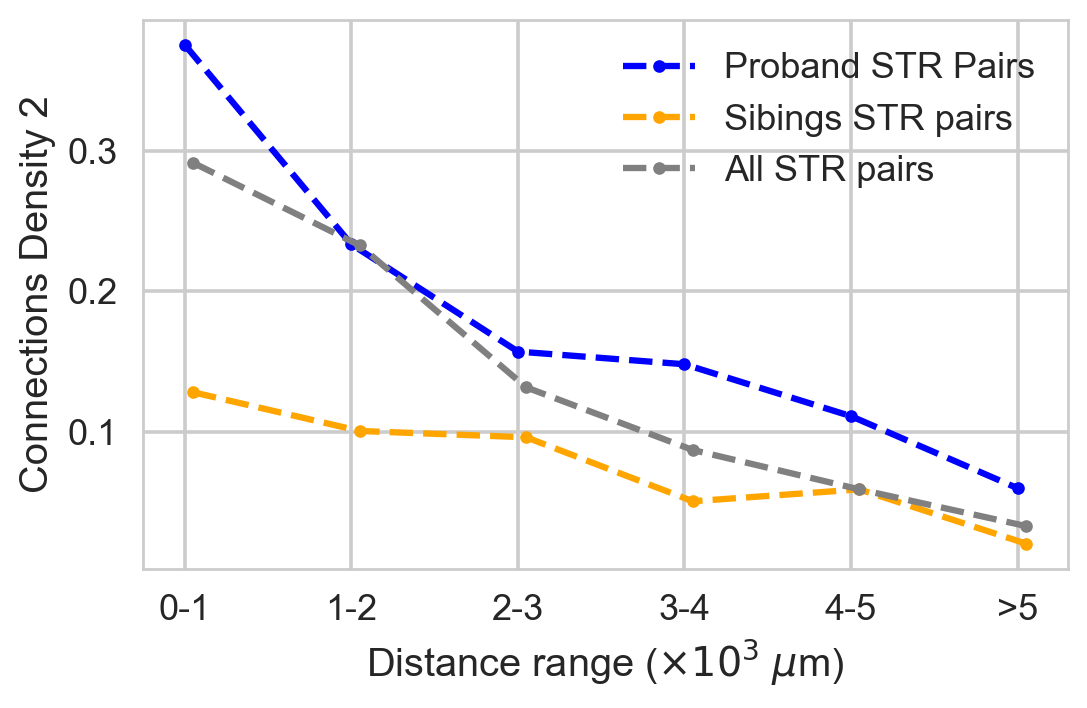

In [150]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=200, figsize=(6,4))

# Conn Normed Density
#ax1.errorbar(np.arange(6), N_conn_asd_binX/N_conn_all_binX, yerr=ASD_Dy/2/N_conn_all_binX, fmt=".", label="Proband Connections", color="blue")
#ax1.errorbar(np.arange(6) + 0.05, N_conn_sib_binX/N_conn_all_binX, yerr=Sib_Dy/2/N_conn_all_binX, fmt=".k", label="Sibings Connections", color="orange")
#ax1.plot(np.arange(6), N_conn_asd_binX/N_conn_all_binX, marker="." , color="blue")
#ax1.plot(np.arange(6) + 0.05, N_conn_sib_binX/N_conn_all_binX, marker=".", color="orange")

# Conn Density
ax1.plot(np.arange(6), N_conn_asd_binX/N_pair_asd_binX, marker=".", label="Proband STR Pairs", color="blue", ls="dashed")
ax1.plot(np.arange(6) + 0.05, N_conn_sib_binX/N_pair_sib_binX, marker=".", label="Sibings STR pairs", color="orange", ls="dashed")
ax1.plot(np.arange(6) + 0.05, N_conn_all_binX/N_pair_all_binX, marker=".", label="All STR pairs", color="grey", ls="dashed")

# Conn Enrichment 
#ax1.plot(np.arange(6), (N_conn_asd_binX/N_pair_asd_binX)/(N_conn_all_binX/N_pair_all_binX), 
#         marker=".", label="Proband STR Pairs", color="blue", ls="dashed")
#ax1.plot(np.arange(6) + 0.05, (N_conn_sib_binX/N_pair_sib_binX)/(N_conn_all_binX/N_pair_all_binX),
#         marker=".", label="Sibings STR pairs", color="orange", ls="dashed")

ax1.grid(True)
ax1.legend()
#ax1.set_title("(N edge/N pair)") # Conn Density
#ax1.set_title("(N edge/N pair)_selected / (N edge/N pair)_all") # Conn Normed Density
#ax1.set_title("(N edge select/N edge all)") # Conn Normed Density
#ax1.set_title("(N edge select/N edge all)") # Conn Normed Density
ax1.set_ylabel("Connections Density 2")
#ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
plt.tight_layout()
plt.savefig("figs/Dist.Conn.Density.2.pdf")
#plt.savefig("figs/Dist.Conn.Enrichment.pdf")


## Table